<a href="https://colab.research.google.com/github/evabravoarroyo/Malware_detection/blob/main/Malware_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MALWARE DETECTION

INTEGRANTES DEL GRUPO

* Eva Bravo
* Raul Neira
* Jose Javier Culebra
* Ricard Colom

# Importar librerías

In [172]:
import numpy as np # Arrays
import pandas as pd # Series and Dataframes

from google.colab import files

#visualizacion
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.options.display.max_rows = 200
plt.style.use('ggplot') # Beautify Plots 

#Modelling
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar database

In [174]:
#file_dir = "/content/drive/MyDrive/Master_DS/TFM_Data_Science/Malware detection/"
file_dir = "/content/drive/MyDrive/NUCLIO/Aprendizaje supervisado/"
file_name = "sample_mmp.csv"

In [175]:
df_raw=pd.read_csv(file_dir+file_name,dtype={29: 'str',42: 'str'} )

# 2 Data Understanding

[Sheets acción por variable](https://docs.google.com/spreadsheets/d/1Ah0JyZ981aeq8IW-osKwwJ061IlAmUgO-1QuvbO9Mhc/edit#gid=0 )                                

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Análisis univariante

2.1.1 Tamaño del dataset

In [177]:
df_raw.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


## 2.1.2 Visualización directa datos

In [178]:
df_raw.head()

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  ...  Census_FirmwareVersionIdentifier  \
0                        NaN  ...                           19951.0   
1                        NaN  ...                           48753.0   
2                        NaN  ...                           33111.0   
3                        NaN  ...                           48473.0   
4                        NaN  ...                            4343.0   

   Census_IsSecureBootEnabled  Census_IsWIMBootEnabled  \
0                           0                      NaN   
1                           0                      0.0   
2                           1                      0.0   
3                           1                      NaN   
4                           1                      NaN   

   Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
0                     0.0                      0                    0   
1                     0.0                      0                    0   
2                     0.0                      1                    1   
3                     0.0                      0                    0   
4                     0.0                      1                    0   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

   Wdft_RegionIdentifier HasDetections  
0                   11.0             1  
1                    3.0             0  
2                   15.0             0  
3                   15.0             1  
4                   13.0             1  

[5 rows x 84 columns]

In [179]:
df_raw.head().T
# A simple vista observamos que nos vamos a encontrar con valores nulos en algunas variables (puede que algunas de ellas estén repletas de nulos)
# También vemos valores bastante repetidos en otras
# Por último a comentar, hay varias boleanas y variables de versiones del producto
# En general son variables muy técnicas

0  \
Unnamed: 0                                                                          8427007   
MachineIdentifier                                          f1cd864e97bae82bdf96523e1a539121   
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                    0   
RtpStateBitfield                                                                        7.0   
IsSxsPassiveMode                                                                          0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                           53447.0   
AVProductsInstalled                                                                     1.0   
AVProductsEnabled                                                                       1.0   
HasTpm                                                                                    1   
CountryIdentifier                                                                         8   
CityIdentifier                                                                      85219.0   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                     205.0   
LocaleEnglishNameIdentifier                                                             172   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                               17134   
OsSuite                                                                                 256   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                             1.0   
AutoSampleOptIn                                                                           0   
PuaMode                                                                                 NaN   
SMode                                                                                   0.0   
IeVerIdentifier                                                                       137.0   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                                1.0   
UacLuaenable                                                                            1.0   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                             1443.0   
Census_OEMModelIdentifier                                                          275891.0   
Census_ProcessorCoreCount                                                               4.0   
Census_ProcessorManufacturerIdentifier                                                  5.0   
Census_ProcessorModelIdentifier                                                      2273.0   
Censu

## 2.1.3 Tipos de atributos disponibles

In [180]:
df_raw.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [181]:
# 30 variables categóricas
# El resto (53) numéricas

## 2.1.4 Estadisticos descriptivos

In [182]:
df_raw.describe(include = ['object']).T
# ProductName, Platform, Processor, OsVer, Census_DeviceFamily, Census_OSArchitecture, Census_GenuineStateName, Census_FlightRing tienen un valor extremadamente repetido.

count  unique  \
MachineIdentifier                 500000  500000   
ProductName                       500000       3   
EngineVersion                     500000      53   
AppVersion                        500000      95   
AvSigVersion                      500000    6455   
Platform                          500000       4   
Processor                         500000       3   
OsVer                             500000      21   
OsPlatformSubRelease              500000       9   
OsBuildLab                        499999     453   
SkuEdition                        500000       8   
PuaMode                              126       1   
SmartScreen                       321404      12   
Census_MDC2FormFactor             500000      12   
Census_DeviceFamily               500000       3   
Census_ProcessorClass               2082       3   
Census_PrimaryDiskTypeName        499291       4   
Census_ChassisTypeName            499963      34   
Census_PowerPlatformRoleName      499998       9   
Census_InternalBatteryType        144397      28   
Census_OSVersion                  500000     305   
Census_OSArchitecture             500000       3   
Census_OSBranch                   500000      15   
Census_OSEdition                  500000      22   
Census_OSSkuName                  500000      21   
Census_OSInstallTypeName          500000       9   
Census_OSWUAutoUpdateOptionsName  500000       6   
Census_GenuineStateName           500000       4   
Census_ActivationChannel          500000       6   
Census_FlightRing                 500000       8   

                                                                       top  \
MachineIdentifier                         f1cd864e97bae82bdf96523e1a539121   
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

   

In [183]:
df_raw.describe(exclude = ['object']).T
#Aquí también vemos algunas variables plagadas de valores prácticamente únicos, como IsBeta (muchos 0) o HasTpm (muchos 1)

count          mean  \
Unnamed: 0                                         500000.0  4.458888e+06   
IsBeta                                             500000.0  2.000000e-06   
RtpStateBitfield                                   498168.0  6.846207e+00   
IsSxsPassiveMode                                   500000.0  1.724200e-02   
DefaultBrowsersIdentifier                           24061.0  1.652825e+03   
AVProductStatesIdentifier                          498062.0  4.785091e+04   
AVProductsInstalled                                498062.0  1.326763e+00   
AVProductsEnabled                                  498062.0  1.020714e+00   
HasTpm                                             500000.0  9.878160e-01   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     481760.0  8.127165e+04   
OrganizationIdentifier                             345437.0  2.486994e+01   
GeoNameIdentifier                                  499984.0  1.697304e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IsProtected                                        498074.0  9.457892e-01   
AutoSampleOptIn                                    500000.0  2.800000e-05   
SMode                                              470152.0  4.381562e-04   
IeVerIdentifier                                    496791.0  1.266626e+02   
Firewall                                           494838.0  9.782414e-01   
UacLuaenable                                       499377.0  1.372503e+01   
Census_OEMNameIdentifier                           494619.0  2.218646e+03   
Census_OEMModelIdentifier                          494236.0  2.391280e+05   
Census_ProcessorCoreCount                          497653.0  3.994074e+00   
Census_ProcessorManufacturerIdentifier             497653.0  4.529069e+00   
Census_ProcessorModelIdentifier                    497651.0  2.370987e+03   
Census_PrimaryDiskTotalCapacity                    497024.0  5.140433e+05   
Census_SystemVolumeTotalCapacity                   497024.0  3.780546e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            495444.0  6.129232e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  497346.0  1.668984e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  497350.0  1.548304e+03   
Census_InternalPrimaryDisplayResolutionVertical    497350.0  8.982393e+02   
Census_InternalBatteryNumberOfCharges              484962.0  1.125600e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 496668.0  1.460551e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_IsPortableOperatingSystem                   500000.0  5.220000e-04   
Census_IsFlightingInternal                          84775.0  2.359186e-05   
Census_IsFlightsDisabled                           491067.0  1.425467e-05   
Census_ThresholdOptIn                              181896.0  2.583894e-04   
Census_FirmwareManufacturerIdentifier              489651.0  4.026759e+02   
Census_FirmwareVersionIdentifier                   490939.0  3.303099e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsWIMBootEnabled                            182334.0  0.000000e+00   
Census_IsVirtualDevice                             499099.0  7.066734e-03   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsPenCapable                                500000.0  3.774400e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            495960.0  5.724454e-02   
Wdft_IsGamer                                      

## 2.1.5 Valores nulos

In [184]:
# Extraemos el número de valores únicos, valores nulos y porcentaje 

missing_value_df = pd.DataFrame({'column_name': df_raw.columns,
                                 'unique_values': df_raw.nunique(dropna = False),
                                 'number_missing' : df_raw.isnull().sum(),
                                 'percent_missing': df_raw.isnull().mean() * 100})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)

In [185]:
missing_value_df

column_name  \
PuaMode                                                                                      PuaMode   
Census_ProcessorClass                                                          Census_ProcessorClass   
DefaultBrowsersIdentifier                                                  DefaultBrowsersIdentifier   
Census_IsFlightingInternal                                                Census_IsFlightingInternal   
Census_InternalBatteryType                                                Census_InternalBatteryType   
Census_ThresholdOptIn                                                          Census_ThresholdOptIn   
Census_IsWIMBootEnabled                                                      Census_IsWIMBootEnabled   
SmartScreen                                                                              SmartScreen   
OrganizationIdentifier                                                        OrganizationIdentifier   
SMode                                                                                          SMode   
CityIdentifier                                                                        CityIdentifier   
Wdft_IsGamer                                                                            Wdft_IsGamer   
Wdft_RegionIdentifier                                                          Wdft_RegionIdentifier   
Census_InternalBatteryNumberOfCharges                          Census_InternalBatteryNumberOfCharges   
Census_FirmwareManufacturerIdentifier                          Census_FirmwareManufacturerIdentifier   
Census_FirmwareVersionIdentifier                                    Census_FirmwareVersionIdentifier   
Census_IsFlightsDisabled                                                    Census_IsFlightsDisabled   
Census_OEMModelIdentifier                                                  Census_OEMModelIdentifier   
Census_OEMNameIdentifier                                                    Census_OEMNameIdentifier   
Firewall                                                                                    Firewall   
Census_TotalPhysicalRAM                                                      Census_TotalPhysicalRAM   
Census_IsAlwaysOnAlwaysConnectedCapable                      Census_IsAlwaysOnAlwaysConnectedCapable   
Census_OSInstallLanguageIdentifier                                Census_OSInstallLanguageIdentifier   
IeVerIdentifier                                                                      IeVerIdentifier   
Census_PrimaryDiskTotalCapacity                                      Census_PrimaryDiskTotalCapacity   
Census_SystemVolumeTotalCapacity                                    Census_SystemVolumeTotalCapacity   
Census_InternalPrimaryDiagonalDisplaySizeInInches  Census_InternalPrimaryDiagonalDisplaySizeInInches   
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionHorizontal   
Census_InternalPrimaryDisplayResolutionVertical      Census_InternalPrimaryDisplayResolutionVertical   
Census_ProcessorModelIdentifier                                      Census_ProcessorModelIdentifier   
Census_ProcessorCoreCount                                                  Census_ProcessorCoreCount   
Census_ProcessorManufacturerIdentifier                        Census_ProcessorManufacturerIdentifier   
AVProductsEnabled                                                                  AVProductsEnabled   
AVProductStatesIdentifier                                                  AVProductStatesIdentifier   
AVProductsInstalled                                                              AVProductsInstalled   
IsProtected                                                                              IsProtected   
RtpStateBitfield                                                                    RtpStateBitfield   
Census_IsVirtualDevice                                                        Census_IsVirtualDevice   
Census_PrimaryDiskTypeName       

In [186]:
# Extraemos los valores más frecuentes de cada columna
columna = []
valor1_perc = []
for i in df_raw.columns:
  columna.append(i)
  valor1_perc.append(round(((df_raw[i].value_counts().iloc[0]/ (len(df_raw) - df_raw[i].isnull().sum())) *100),5))

In [187]:
frecuency_df = pd.DataFrame({'column_name': columna,
                              'valor1_perc' : valor1_perc})

frecuency_df.sort_values('valor1_perc', inplace=True, ascending = False)

In [188]:
frecuency_df
# Confirmamos que hay bastante variables con valores prácticamente únicos, serán susceptibles de ser eliminadas más adelante.
# Concretamente PuaMode y Census_IsWIMBootEnabled solamente tienen un valor único. Además para estas variables el % de nulos es de 99.9748 y 95.1878 respectivamente.

column_name  valor1_perc
29                                            PuaMode    100.00000
76                            Census_IsWIMBootEnabled    100.00000
6                                              IsBeta     99.99980
70                           Census_IsFlightsDisabled     99.99857
69                         Census_IsFlightingInternal     99.99764
28                                    AutoSampleOptIn     99.99720
72                              Census_ThresholdOptIn     99.97416
30                                              SMode     99.95618
66                   Census_IsPortableOperatingSystem     99.94780
36                                Census_DeviceFamily     99.83660
34                                       UacLuaenable     99.37903
77                             Census_IsVirtualDevice     99.29333
2                                         ProductName     98.92080
13                                             HasTpm     98.78160
8                                    IsSxsPassiveMode     98.27580
33                                           Firewall     97.82414
12                                  AVProductsEnabled     97.41337
7                                    RtpStateBitfield     97.32480
21                                              OsVer     96.76600
19                                           Platform     96.60960
79                                Census_IsPenCapable     96.22560
27                                        IsProtected     94.57892
80            Census_IsAlwaysOnAlwaysConnectedCapable     94.27555
71                                  Census_FlightRing     93.65980
46                         Census_HasOpticalDiskDrive     92.29660
56                              Census_OSArchitecture     90.88700
20                                          Processor     90.88460
67                            Census_GenuineStateName     88.28040
40             Census_ProcessorManufacturerIdentifier     88.21970
78                              Census_IsTouchEnabled     87.45660
53                         Census_InternalBatteryType     78.60274
32                                        SmartScreen     75.16832
81                                       Wdft_IsGamer     71.59404
11                                AVProductsInstalled     69.88006
52                       Census_PowerPlatformRoleName     69.27588
16                             OrganizationIdentifier     67.99648
10                          AVProductStatesIdentifier     65.54666
44                         Census_PrimaryDiskTypeName     65.17822
35                              Census_MDC2FormFactor     64.18960
23                                            OsSuite     62.24520
26                                         SkuEdition     61.71340
39                          Census_ProcessorCoreCount     61.10724
48                             Census_ChassisTypeName     58.85075
54              Census_InternalBatteryNumberOfCharges     58.39406
4                                          AppVersion     57.76180
42                              Census_ProcessorClass     57.44476
51    Census_InternalPrimaryDisplayResolutionVertical     55.84840
68                           Census_ActivationChannel     52.98640
75                         Census_IsSecureBootEnabled     51.45620
50  Census_InternalPrimaryDisplayResolutionHorizontal     50.66834
83                                      HasDetections     50.00940
47                            Census_TotalPhysicalRAM     46.15618
57                                    Census_OSBranch     45.20020
58                               Census_OSBuildNumber     45.19580
65                   Census_OSWUAutoUpdateOptionsName     44.49640
22                                            OsBuild     44.15580
24                               OsPlatformSubRelease     44.15580
31                                    IeVerIdentifier     44.11151
3                                       EngineVersion     43.29820
25                    

## 2.1.6 Análisis del target

In [189]:
TARGET = "HasDetections"

In [190]:
df_raw[TARGET].value_counts()

0    250047
1    249953
Name: HasDetections, dtype: int64

In [191]:
df_raw[TARGET].mean()

0.499906

In [192]:
# Muestra balanceada
# Sin nulos
# Media = 49.9906%

## 2.1.7 Distribución de las variables

### Variables numéricas

In [193]:
df_raw.select_dtypes(include= ["number"]).columns

Index(['Unnamed: 0', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfChar

In [194]:
for i in df_raw.select_dtypes(include= ["number"]).columns:
     print(i, df_raw[i].value_counts())
     
#COMENTARIOS SOBRE ALGUNAS DE LAS VARIABLES NUMÉRICAS

# Unnamed es el índice. Más adelante será sustituido por el identificador de la máquina (MachineIdentifier)

# RtpStateBitfield tiene un altísimo % de valores únicos = 7
# AVProductsEnabled tiene un altísimo % de valores únicos = 1.0
# IsSxsPassiveMode tiene un altísimo % de valores únicos = 0
# IsProtected tiene un altísimo % de valores únicos = 1
# HasTpm tiene un altísimo % de valores únicos = 1
# Firewall tiene un altísimo % de valores únicos = 1
# UacLuaenable tiene un altísimo % de valores únicos = 1.0
# Census_HasOpticalDiskDrive tiene un altísimo % de valores únicos = 0
# Census_ProcessorManufacturerIdentifier tiene un altísimo % de valores únicos = 5.0
# Census_IsVirtualDevice tiene un altísimo % de valores únicos = 0
# Census_IsTouchEnabled tiene un altísimo % de valores únicos = 0
# Census_IsPenCapable tiene un altísimo % de valores únicos = 0
# Census_IsAlwaysOnAlwaysConnectedCapable tiene un altísimo % de valores únicos = 0

# AVProductStatesIdentifier tiene un buen % de valores únicos = 53447.0 
# AVProductsInstalled tiene un buen % de valores únicos = 1.0
# OrganizationIdentifier tiene un buen % de valores únicos = 27.0
# OsBuild tiene un buen % de valores únicos = 17134 y 139901
# OsSuite tiene un buen % de valores únicos = 768 y 256
# IeVerIdentifier tiene un buen % de valores únicos = 137.0
# Census_ProcessorCoreCount tiene un buen % de valores únicos = 4.0 
# Census_PrimaryDiskTotalCapacity tiene un buen % de valores únicos = 476940.0 y 953869.0
# Census_TotalPhysicalRAM tiene un buen % de valores únicos = 4096.0
# Census_InternalPrimaryDisplayResolutionHorizontal tiene un buen % de valores únicos = 1366.0
# Census_InternalPrimaryDisplayResolutionVertical tiene un buen % de valores únicos = 768.0
# Census_InternalBatteryNumberOfCharges tiene un buen % de valores únicos = 0.000000e+00
# Census_OSBuildNumber tiene un buen % de valores únicos = 17134
# Wdft_IsGamer tiene un buen % de valores únicos = 0

# Census_IsWIMBootEnabled tiene un solo valor único de 0
# IsBeta se puede considerar que tiene un valor único de 0
# Census_IsPortableOperatingSystem se puede considerar que tiene un valor único de 0
# Census_IsFlightingInternal  se puede considerar que tiene un valor único de 0
# Census_IsFlightsDisabled se puede considerar que tiene un valor único de 0
# Census_ThresholdOptIn se puede considerar que tiene un valor único de 0
# AutoSampleOptIn se puede considerar que tiene un valor único de 0
# SMode se puede considerar que tiene un valor único de 0





Unnamed: 0 8427007    1
4076126    1
7315011    1
7257590    1
4851285    1
          ..
3391674    1
6246089    1
42434      1
7181890    1
4295573    1
Name: Unnamed: 0, Length: 500000, dtype: int64
IsBeta 0    499999
1         1
Name: IsBeta, dtype: int64
RtpStateBitfield 7.0     484841
0.0      10610
8.0       1277
5.0       1158
3.0        176
1.0        105
35.0         1
Name: RtpStateBitfield, dtype: int64
IsSxsPassiveMode 0    491379
1      8621
Name: IsSxsPassiveMode, dtype: int64
DefaultBrowsersIdentifier 239.0     2589
3195.0    2423
1632.0    1601
3176.0    1313
146.0     1231
          ... 
2285.0       1
2100.0       1
2459.0       1
2196.0       1
1427.0       1
Name: DefaultBrowsersIdentifier, Length: 554, dtype: int64
AVProductStatesIdentifier 53447.0    326463
7945.0      26642
47238.0     18436
62773.0     14931
46413.0      6343
            ...  
2451.0          1
19604.0         1
3193.0          1
26492.0         1
18324.0         1
Name: AVProductStatesIdentifie

### Variables categóricas

In [195]:
# Función para graficar variables categóricas

def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    #en una única grafica de 2x1 en el primer slot
    ax1 = plt.subplot(2,1,1)
    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        data = dataframe, x = column,
        order = list(dataframe[column].unique())
    )
    ax2 = plt.subplot(2,1,2) # share ax1 para que me pinte el axis en el mismo orden
    ## Graficamos la distribución del target sólo para aquellos casos con target > 0 (para que no se chafe el BP) 
    ax2 = sns.boxenplot(
        data = dataframe[dataframe[target_column] > 0], 
        x = column,
        y = target_column,
        order = list(dataframe[column].unique())
    )
    plt.show()


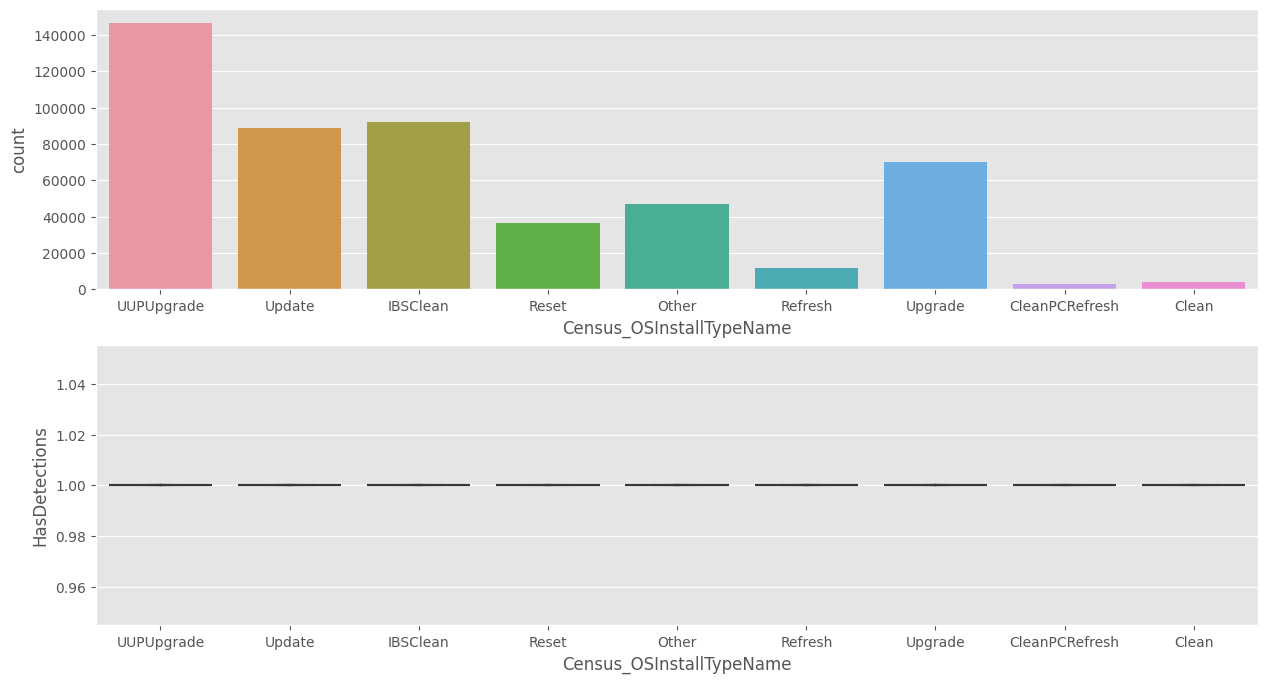

In [196]:
plot_cat_values(df_raw, "Census_OSInstallTypeName", TARGET)

In [197]:
for i in df_raw.select_dtypes(exclude= ["number"]).columns:
  print(i, df_raw[i].value_counts())

  # COMENTARIOS SOBRE ALGUNAS DE LAS VARIABLES NO NUMÉRICAS

  # MachineIdentifier será nuestro índice

  # Census_OSEdition tiene un altísimo % de valores únicos entre Core, Professional y CoreSingleLanguage          
  # Census_OSSkuName tiene un altísimo % de valores únicos entre CORE, PROFESSIONAL y CORE_SINGLELANGUAGE  (analizar si debemos eliminar una de estas dos variables)

  # ProductName tiene un altísimo % de valores únicos = win8defender     
  # EngineVersion tiene un altísimo % de valores únicos entre las versiones 1.1.15200.1 y 1.1.15100.1
  # Platform tiene un altísimo % de valores únicos = windows10 
  # Processor tiene un altísimo % de valores únicos = x64      
  # OsVer tiene un altísimo % de valores únicos = 10.0.0.0
  # Census_OSArchitecture tiene un altísimo % de valores únicos = amd64
  # Census_GenuineStateName tiene un altísimo % de valores únicos = IS_GENUINE         
  # Census_ActivationChannel tiene un altísimo % de valores únicos entre Retail y Unknown-NOT_SET 


  # AppVersion tiene un buen % de valores únicos = 4.18.1807.18075    
  # OsPlatformSubRelease tiene un buen % de valores únicos = rs4           
  # OsBuildLab tiene un buen % de valores únicos = 17134.1.amd64fre.rs4_release.180410-1804
  # SkuEdition tiene un buen % de valores únicos = Home               
  # SmartScreen tiene un buen % de valores únicos = RequireAdmin    
  # Census_MDC2FormFactor tiene un buen % de valores únicos = Notebook        
  # Census_PrimaryDiskTypeName tiene un buen % de valores únicos = HDD            
  # Census_ChassisTypeName tiene un buen % de valores únicos = Notebook               
  # Census_PowerPlatformRoleName tiene un buen % de valores únicos = Mobile               
  # Census_InternalBatteryType tiene un buen % de valores únicos = lion   
  # Census_OSBranch tiene un buen % de valores únicos = rs4_release  

  # Census_DeviceFamily se puede considerar que tiene un solo valor único = Windows.Desktop     

MachineIdentifier f1cd864e97bae82bdf96523e1a539121    1
74f5f637add24668804961d81cca7697    1
d1e0560ad7cd178b32599edb67142737    1
d03a6fb0852e2ad3380e689a80d23273    1
8b3a780e6980a83b1650e7fc873dcfd1    1
                                   ..
6154953dc05531cad9fb680cf39990b4    1
b345b8ccc72ba43e7417b2018fb61444    1
013b44e10f97fa8f71b6b76e24323d51    1
ce0e5ba490a2455a87d09184b9bbd578    1
7b45dc3537e17f16305c5983ca0a1cb9    1
Name: MachineIdentifier, Length: 500000, dtype: int64
ProductName win8defender     494604
mse                5395
mseprerelease         1
Name: ProductName, dtype: int64
EngineVersion 1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13

#3 Data Preparation

## Definición de funciones personalizadas

In [198]:
# Agrupar categorías con pocos registros en un "Others"

def setOthers(dataframe, column_name, num_values):
    top_categories = dataframe[column_name].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('Others')
    dataframe[column_name] = pd.Categorical(dataframe[column_name], categories=top_categories_list)
    return dataframe[column_name].fillna('Others')

In [199]:
# MinMax Scaler
def minmaxsc(dataframe, column_name):
  minMaxResultado = MinMaxScaler()
  dataframe[column_name] = minMaxResultado.fit_transform(dataframe[column_name].values.reshape(-1,1))

In [200]:
# OneHotEncoding
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

## Transformación de variables

In [201]:
df1 = df_raw.copy()

In [202]:
# Definimos el ID "MachineIdentifier" como index

df1.set_index('MachineIdentifier', inplace=True)

In [203]:
# Borramos columna "Unnamed"

df1.drop("Unnamed: 0", axis=1, inplace=True)

In [204]:
# Las variables que incluyen la palabra "Identifier" son ID que deben ser tomadas como categóricas y en muchos casos son numéricas. 

lista_ids = [col for col in df1.columns if 'Identifier' in col]

for i in lista_ids:
  df1[i] = df1[i].astype(object)

In [205]:
# Las variables "Census_OSVersion", "AppVersion", "EngineVersion" ,"OsVer" y "AvSigVersion" son una versión, es decir, que se pueden tomar como una variable numérica ordinal

lista_versiones = ["Census_OSVersion", "AppVersion", "EngineVersion","AvSigVersion","OsVer"]

for i in lista_versiones:
  df1[i] = df1[i].str.replace(".","",regex=False).astype(int)

In [206]:
# La variable "UacLuaenable" debería ser booleana pero tiene más de 2 registros. Asignamos valor extremo (-1) a los outliers

df1["UacLuaenable"] = df1["UacLuaenable"].replace(df1[df1["UacLuaenable"]>1]["UacLuaenable"].unique(),-1)

In [207]:
# La variable "PuaMode" debería ser booleana pero tiene texto (on/off) en lugar de números. Asignamos valor extremo (-1) a los outliers

df1["PuaMode"] = df1["PuaMode"].replace("on",1)

In [208]:
# La variable "Census_ProcessorClass" tiene 3 valores, low, mid y high, que pueden transformarse en 1, 2, 3

df1["Census_ProcessorClass"] = df1["Census_ProcessorClass"].replace("low",1)
df1["Census_ProcessorClass"] = df1["Census_ProcessorClass"].replace("mid",2)
df1["Census_ProcessorClass"] = df1["Census_ProcessorClass"].replace("high",3)

### Eliminar variables

In [209]:
# Eliminamos atributos con más del 95% de valores nulos

df1.drop(missing_value_df[missing_value_df["percent_missing"]>= 95]['column_name'].values, axis = 1, inplace = True)

print("Estos son los atributos eliminados por gran cantidad de nulos:\n" ,missing_value_df[missing_value_df["percent_missing"]>= 95]['column_name'].values)

Estos son los atributos eliminados por gran cantidad de nulos:
 ['PuaMode' 'Census_ProcessorClass' 'DefaultBrowsersIdentifier']


In [210]:
# Reejecutamos este dataframe para actualizar con las columnas que se han eliminado
columna = []
valor1_perc = []
for i in df1.columns:
  columna.append(i)
  valor1_perc.append(round(((df1[i].value_counts().iloc[0]/ (len(df1) - df1[i].isnull().sum())) *100),5))

In [211]:
frecuency_df = pd.DataFrame({'column_name': columna,
                              'valor1_perc' : valor1_perc})

frecuency_df.sort_values('valor1_perc', inplace=True, ascending = False)

In [212]:
# Eliminamos atributos con más del 95% de valores únicos

df1.drop(frecuency_df[frecuency_df["valor1_perc"]>= 95]['column_name'].values, axis = 1, inplace = True)

print("Estos son los atributos eliminados por baja varianza:\n" ,frecuency_df[frecuency_df["valor1_perc"]>= 95]['column_name'].values)

Estos son los atributos eliminados por baja varianza:
 ['Census_IsWIMBootEnabled' 'IsBeta' 'Census_IsFlightsDisabled'
 'Census_IsFlightingInternal' 'AutoSampleOptIn' 'Census_ThresholdOptIn'
 'SMode' 'Census_IsPortableOperatingSystem' 'Census_DeviceFamily'
 'UacLuaenable' 'Census_IsVirtualDevice' 'ProductName' 'HasTpm'
 'IsSxsPassiveMode' 'Firewall' 'AVProductsEnabled' 'RtpStateBitfield'
 'OsVer' 'Platform' 'Census_IsPenCapable']


In [213]:
# Lo dejamos comentado por el momento

# df1.drop('Census_OSSkuName', axis = 1, inplace = True)

In [214]:
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 59 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      500000 non-null  int64  
 1   AppVersion                                         500000 non-null  int64  
 2   AvSigVersion                                       500000 non-null  int64  
 3   AVProductStatesIdentifier                          498062 non-null  object 
 4   AVProductsInstalled                                498062 non-null  float64
 5   CountryIdentifier                                  500000 non-null  object 
 6   CityIdentifier                                     481760 non-null  object 
 7   OrganizationIdentifier                             345437 non-null  object 
 8   GeoNameIdentifier     

In [215]:
df2 = df1.copy()

### Imputación de nulos

In [216]:
# Vamos a hacer un decision tree, por lo que imputaremos valores extremos a los nulos
pd.options.mode.chained_assignment = None

lista_de_nulos_1 = ["CityIdentifier"]

lista_de_nulos_1_neg = ["Census_TotalPhysicalRAM","Census_PrimaryDiskTotalCapacity","Census_SystemVolumeTotalCapacity","Census_InternalPrimaryDiagonalDisplaySizeInInches",
                        "Census_InternalPrimaryDisplayResolutionVertical","Census_InternalPrimaryDisplayResolutionHorizontal","IeVerIdentifier","Census_ProcessorCoreCount","IsProtected",
                        "Wdft_IsGamer","Census_InternalBatteryNumberOfCharges","Census_OEMNameIdentifier","Census_OEMModelIdentifier","SmartScreen",
                        "Wdft_RegionIdentifier","Census_FirmwareVersionIdentifier","Census_IsAlwaysOnAlwaysConnectedCapable","Census_PrimaryDiskTypeName","GeoNameIdentifier","OrganizationIdentifier",
                        "Census_OSInstallLanguageIdentifier","Census_ProcessorModelIdentifier","Census_ProcessorManufacturerIdentifier","AVProductsInstalled",
                        "AVProductStatesIdentifier","Census_FirmwareManufacturerIdentifier","Census_ChassisTypeName"]

lista_de_nulos_2 = []

lista_de_nulos_zzz = ["Census_InternalBatteryType"]

for i in lista_de_nulos_1:
  df2[i].fillna(value = 1, inplace = True)
  
for i in lista_de_nulos_1_neg:
  df2[i].fillna(value = -1, inplace = True)

for i in lista_de_nulos_2:
  df2[i].fillna(value = 2, inplace = True)

for i in lista_de_nulos_zzz:
  df2[i].fillna(value = "zzz", inplace = True)

In [217]:
# Imputación de valor nulo único a "OsBuildLab"

df2[df2["OsBuildLab"].isnull()]["OsBuild"]

MachineIdentifier
bd5f382e3f36b1277b1d7d6cab352c23    17134
Name: OsBuild, dtype: int64

In [218]:
df2[df2["OsBuild"] == 17134]["OsBuildLab"].value_counts(normalize = True)

17134.1.amd64fre.rs4_release.180410-1804       0.935039
17134.1.x86fre.rs4_release.180410-1804         0.064925
17134.1.arm64fre.rs4_release.180410-1804       0.000032
14453.1944.amd64fre.rs1_release.171111-2100    0.000005
Name: OsBuildLab, dtype: float64

In [219]:
# El valor nulo tiene una "OsBuild" con valor 17134 y el 93,5% de registros con este valor tiene el mismo "OsBuildLab". Imputamos este valor al nulo.
df2["OsBuildLab"].fillna(value = "17134.1.amd64fre.rs4_release.180410-1804", inplace = True)

### Agrupar en Others

In [220]:
# Agrupamos las variables con categorías con muy pocos registros en una nueva categoría "Others"

# Census_PowerPlatformRoleName
df2["Census_PowerPlatformRoleName"] = setOthers(df2, "Census_PowerPlatformRoleName", 5)

#Census_InternalBatteryType
df2["Census_InternalBatteryType"] = setOthers(df2, "Census_InternalBatteryType", 5)

#Census_FlightRing
df2["Census_FlightRing"] = setOthers(df2, "Census_FlightRing", 3)

#Census_MDC2FormFactor
df2["Census_MDC2FormFactor"] = setOthers(df2, "Census_MDC2FormFactor", 8)

#Census_OSEdition
df2["Census_OSEdition"] = setOthers(df2, "Census_OSEdition", 7)

#SmartScreen
df2["SmartScreen"] = df2["SmartScreen"].replace("off", "Off")
df2["SmartScreen"] = setOthers(df2, "SmartScreen", 7)

#Census_OSEdition
df2["Census_PrimaryDiskTypeName"] = setOthers(df2, "Census_PrimaryDiskTypeName", 2)

#OsSuite
df2["OsSuite"] = setOthers(df2, "OsSuite", 3)

#Census_OSBuildNumber
df2["Census_OSBuildNumber"] = setOthers(df2, "Census_OSBuildNumber", 6)

#Census_ProcessorManufacturerIdentifier
df2["Census_ProcessorManufacturerIdentifier"] = setOthers(df2, "Census_ProcessorManufacturerIdentifier", 2)

#Census_ChassisTypeName
df2["Census_ChassisTypeName"] = setOthers(df2, "Census_ChassisTypeName", 13)

#Census_OSArchitecture
df2["Census_OSArchitecture"] = setOthers(df2, "Census_OSArchitecture", 2)

#Census_OSBranch
df2["Census_OSBranch"] = setOthers(df2, "Census_OSBranch", 9)



In [221]:
# Census_OSSkuName
df2["Census_OSSkuName"] = setOthers(df2, "Census_OSSkuName", 9)

### Análisis frente al target (disaster)

In [222]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 59 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   EngineVersion                                      500000 non-null  int64   
 1   AppVersion                                         500000 non-null  int64   
 2   AvSigVersion                                       500000 non-null  int64   
 3   AVProductStatesIdentifier                          500000 non-null  float64 
 4   AVProductsInstalled                                500000 non-null  float64 
 5   CountryIdentifier                                  500000 non-null  object  
 6   CityIdentifier                                     500000 non-null  float64 
 7   OrganizationIdentifier                             500000 non-null  float64 
 8   GeoNameIdent

In [223]:
object_vars = df2.select_dtypes(include=['category']).columns.to_list()
object_vars

['OsSuite',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_FlightRing']

In [224]:
for i in df2:
  df2[i].dtype.kind
  print(i,df2[i].dtype.kind)

EngineVersion i
AppVersion i
AvSigVersion i
AVProductStatesIdentifier f
AVProductsInstalled f
CountryIdentifier O
CityIdentifier f
OrganizationIdentifier f
GeoNameIdentifier f
LocaleEnglishNameIdentifier O
Processor O
OsBuild i
OsSuite O
OsPlatformSubRelease O
OsBuildLab O
SkuEdition O
IsProtected f
IeVerIdentifier f
SmartScreen O
Census_MDC2FormFactor O
Census_OEMNameIdentifier f
Census_OEMModelIdentifier f
Census_ProcessorCoreCount f
Census_ProcessorManufacturerIdentifier O
Census_ProcessorModelIdentifier f
Census_PrimaryDiskTotalCapacity f
Census_PrimaryDiskTypeName O
Census_SystemVolumeTotalCapacity f
Census_HasOpticalDiskDrive i
Census_TotalPhysicalRAM f
Census_ChassisTypeName O
Census_InternalPrimaryDiagonalDisplaySizeInInches f
Census_InternalPrimaryDisplayResolutionHorizontal f
Census_InternalPrimaryDisplayResolutionVertical f
Census_PowerPlatformRoleName O
Census_InternalBatteryType O
Census_InternalBatteryNumberOfCharges f
Census_OSVersion i
Census_OSArchitecture O
Census_OSB

In [225]:
df2[object_vars] = df2[object_vars].astype('object')

<ipython-input-226-4289b02d20d9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


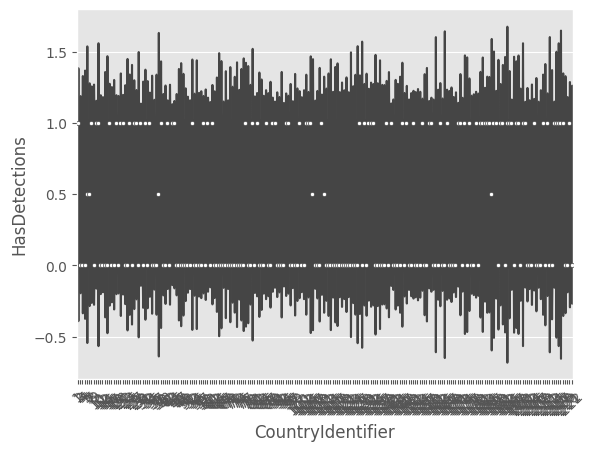

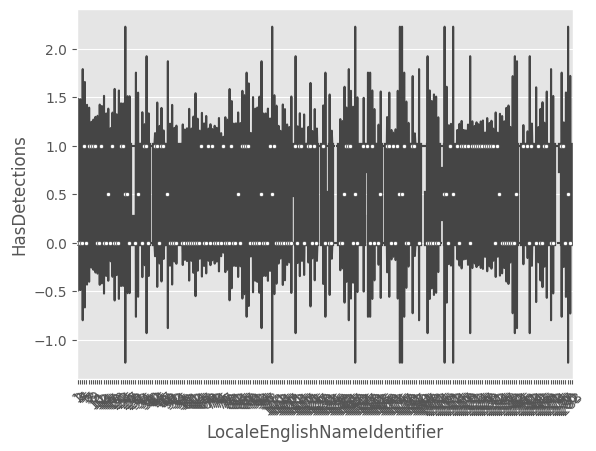

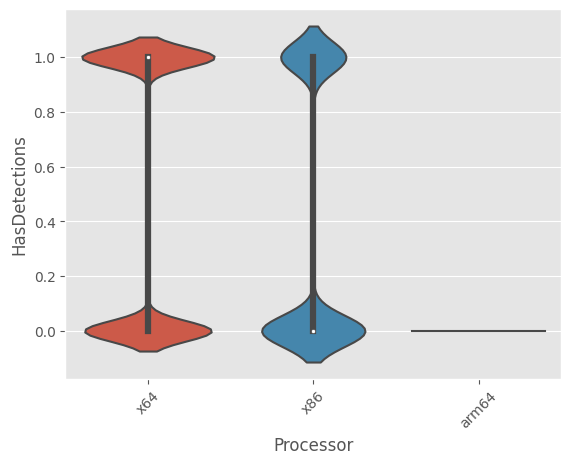

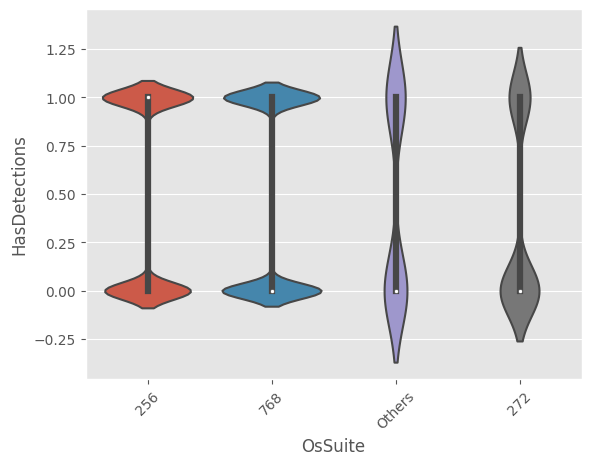

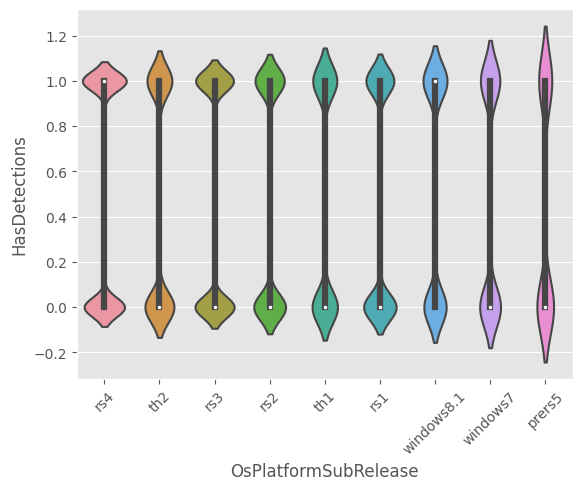

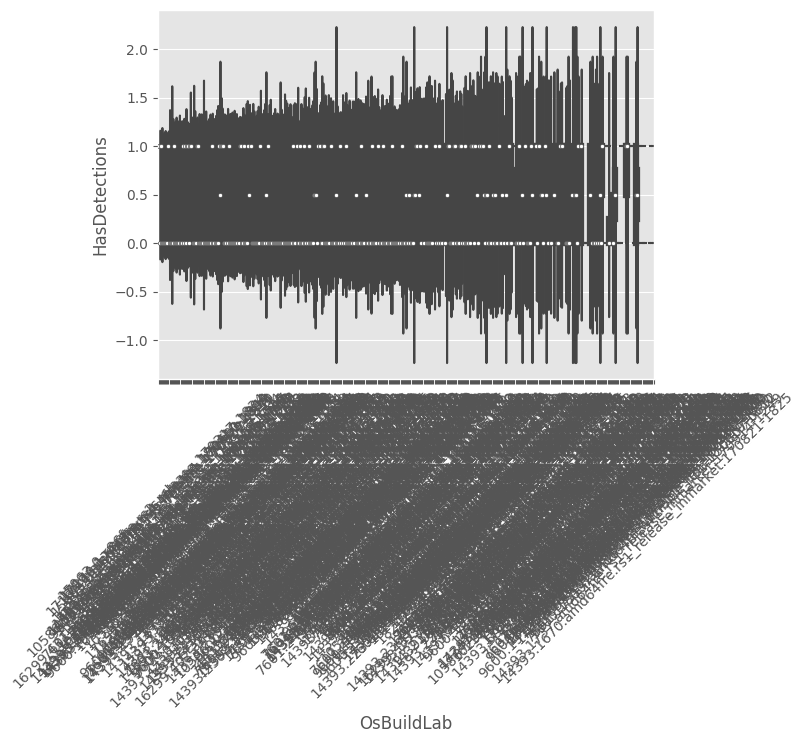

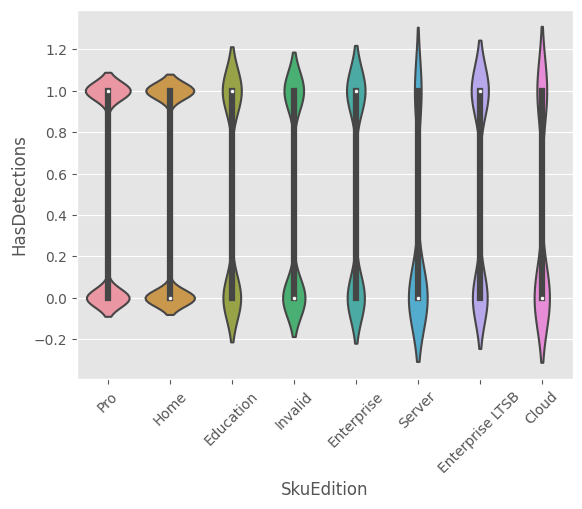

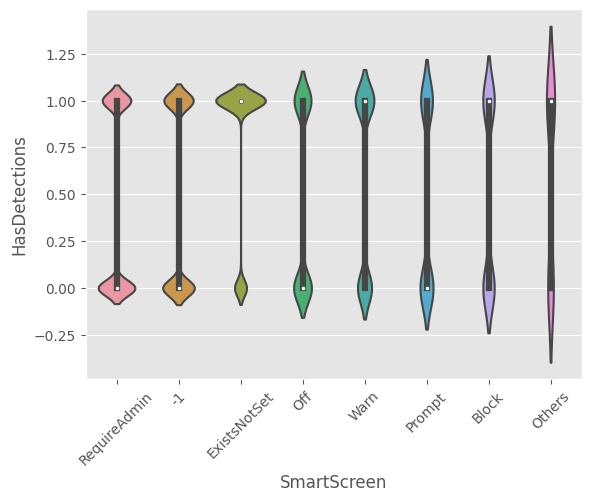

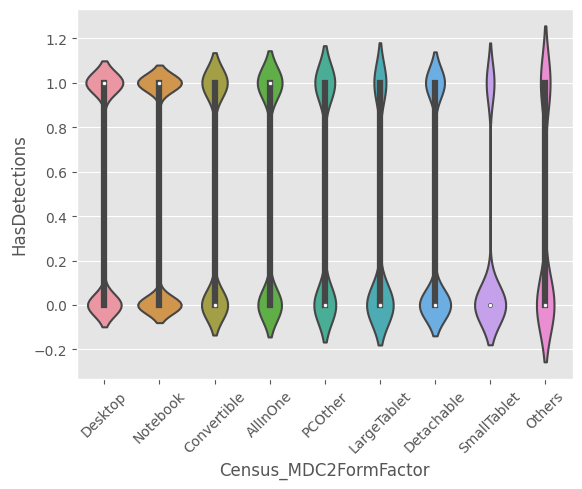

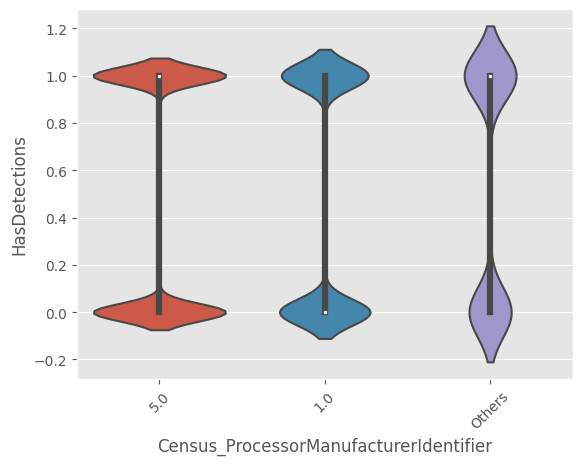

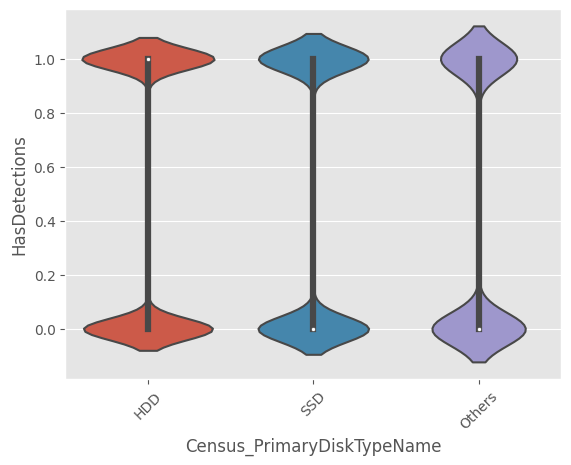

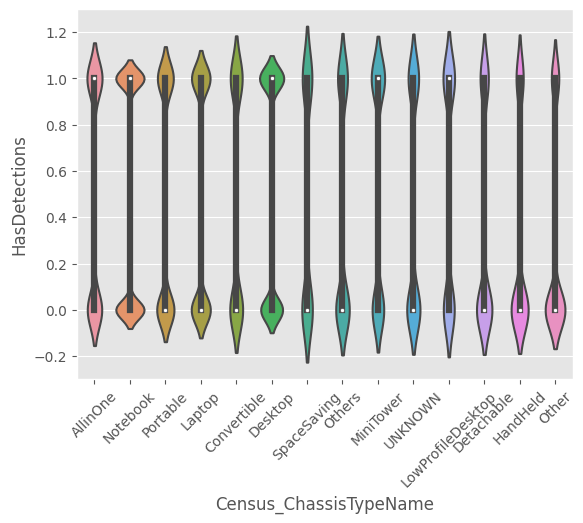

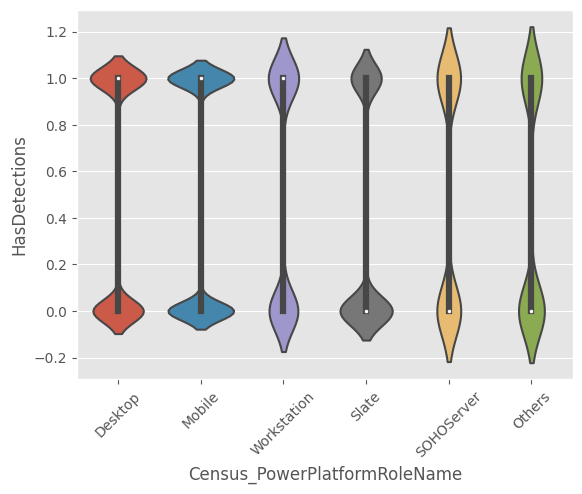

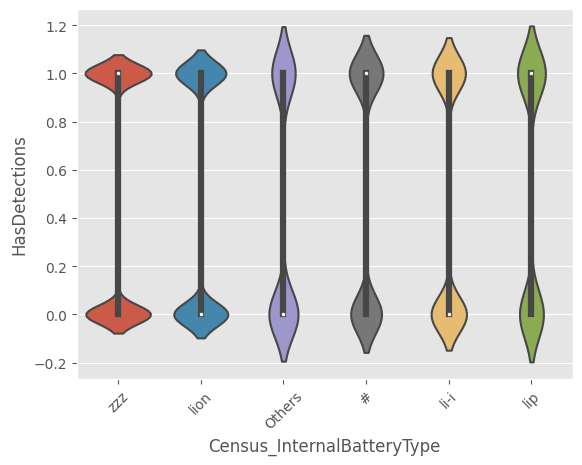

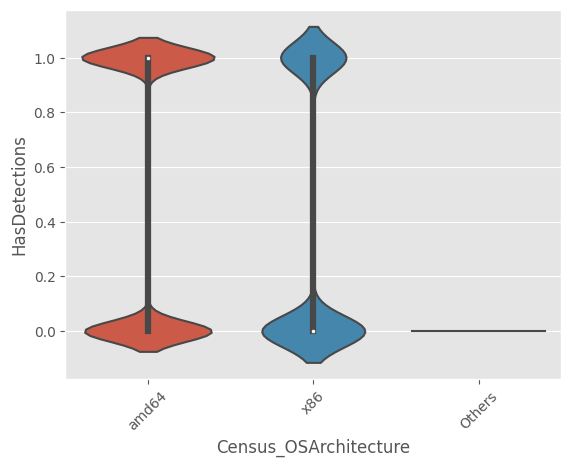

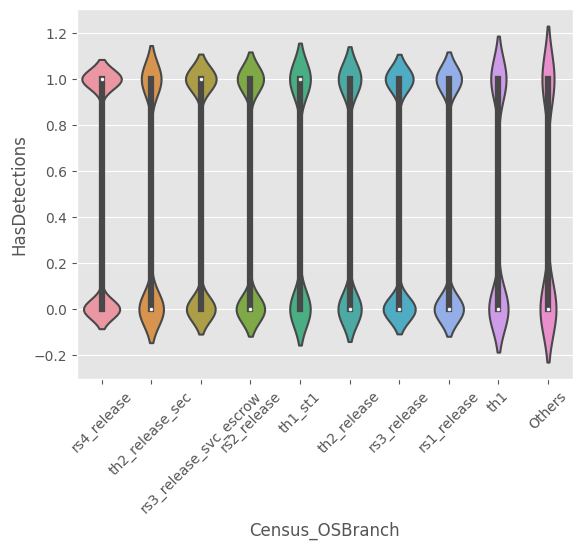

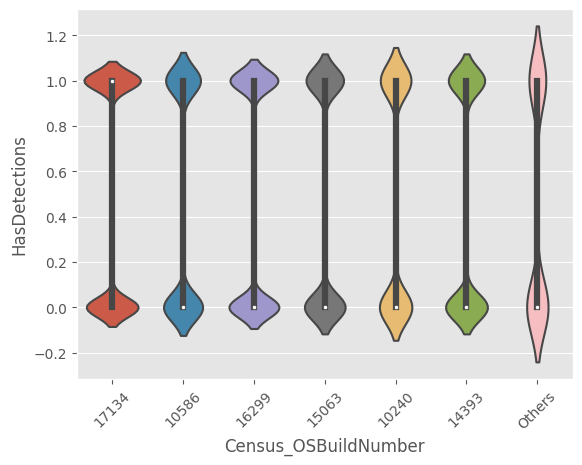

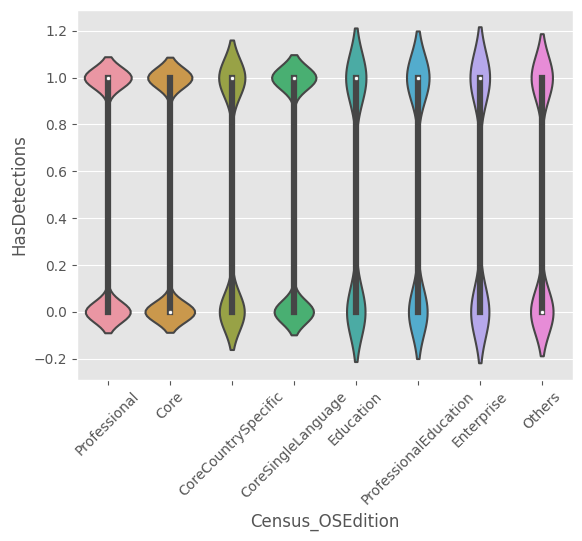

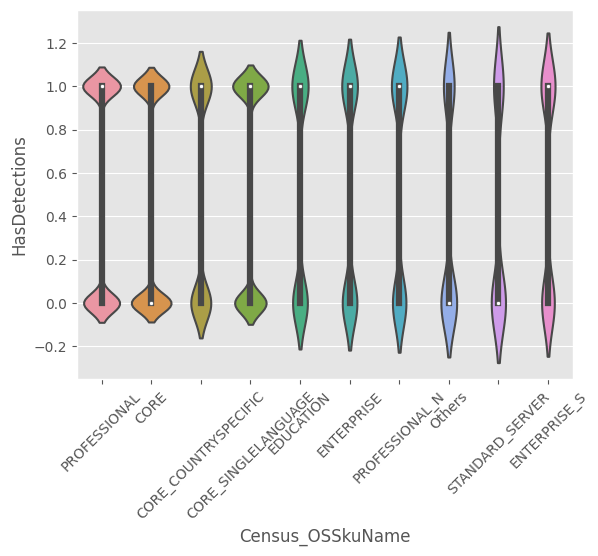

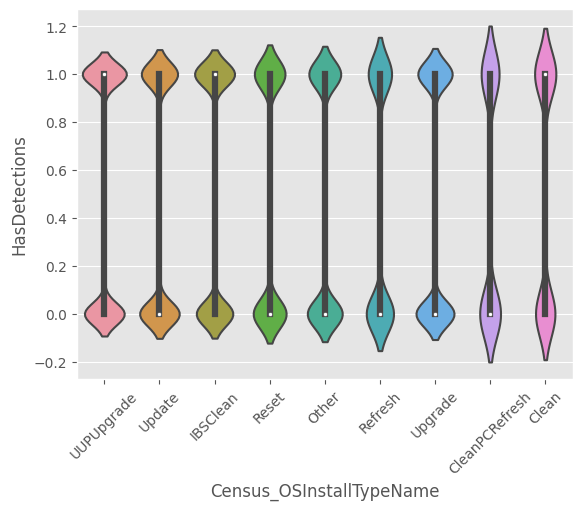

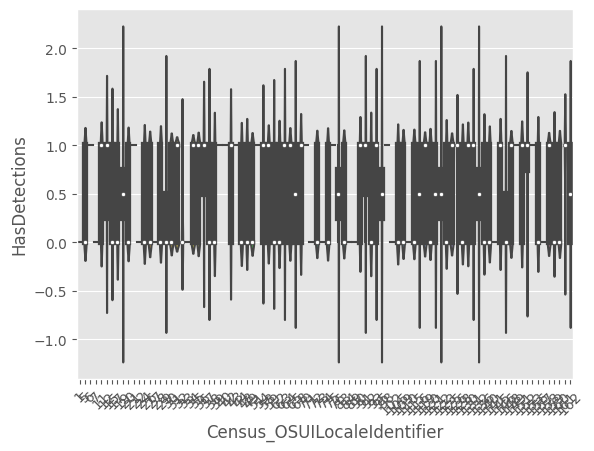

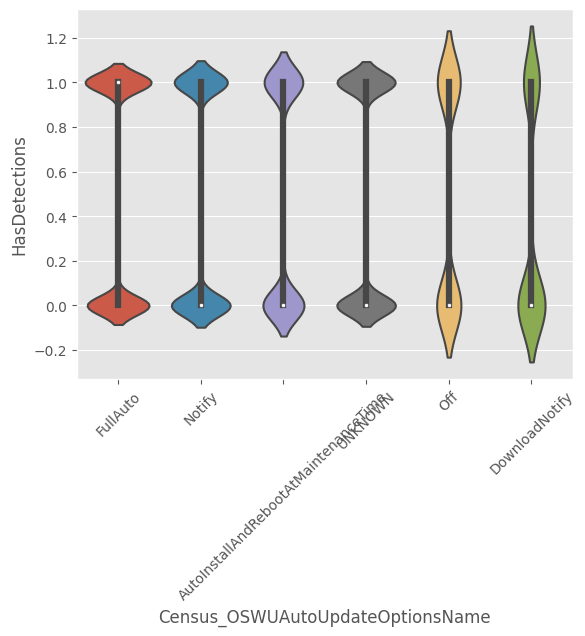

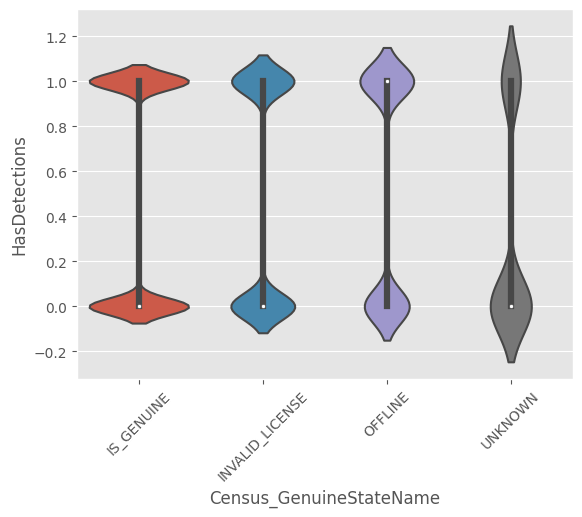

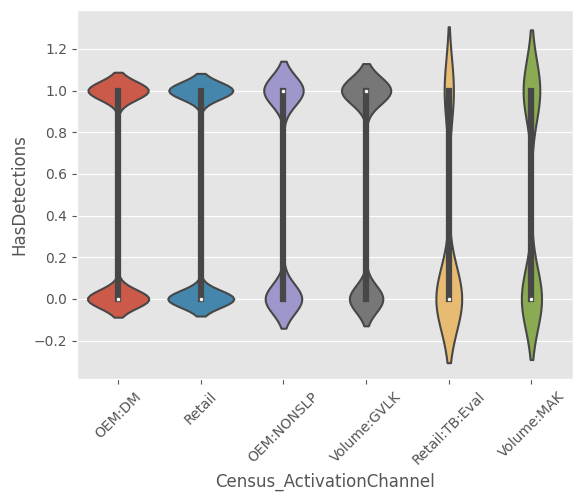

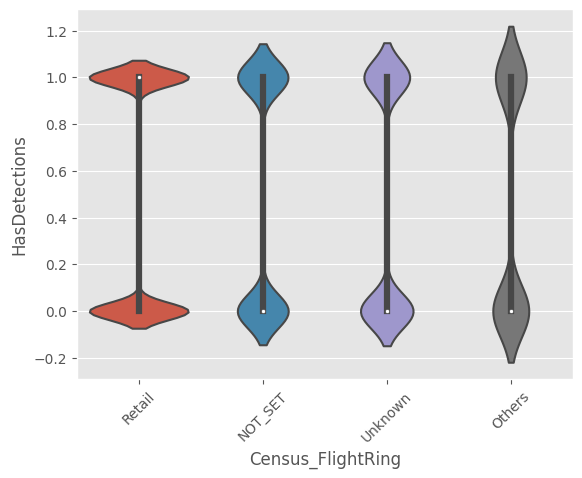

In [226]:
# Violinplot
for i in df2:
  if (df2[i].dtype.kind =="O"):
    plt.figure()
    ax = sns.violinplot(x=i,y=TARGET, data=df2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [227]:
# Analizando los violin plots podemos observar que las siguientes variables pueden ser buenas predictoras:

   # Processor -- > x86 es buena predictora de HasDetections = 0 
   # OsSuite --> 272 es buena predictora de HasDetections = 0   
   # SkuEdition --> Server es buena predictora de HasDetections = 0 
   # SmartScreen --> ExistsNotSet es buena predictora de HasDetections = 1 
   # SmartScreen --> RequireAdmin es buena predictora de HasDetections = 0 
   # Census_MDC2FormFactor --> LargeTablet, SmallTablet y Others son buenas predictoras de HasDetections = 0 
   # Census_PowerPlatformRoleName --> Slate es buena predictora de HasDetections = 0 
   # Census_OSArchitecture --> x86 es buena predictora de HasDetections = 0 
   # Census_GenuineStateName --> UNKNOWN es buena predictora de HasDetections = 0 
   # CensusÇ_ActivationChannel --> Volume:GVLK es buena predictora de HasDetections = 1 
   # CensusÇ_ActivationChannel --> Retail:TB:Eval es buena predictora de HasDetections = 0 


In [228]:
# Pivot tables

for i in df2:
  if (df2[i].dtype.kind =="O"):
      _results_df=df2.pivot_table(index=i,values=TARGET,aggfunc=[np.sum,np.mean])
      _results_df.columns = ['number_detec', 'mean_detect']
      _results_df['pct_rows'] = df2[i].value_counts(normalize=True, dropna=False)
      _results_df = _results_df[['pct_rows', 'number_detec','mean_detect']]
      _results_df = _results_df.sort_values(by=['number_detec','mean_detect'], ascending=False)
      print(f'results_df para la columna { i}: ')
      print(_results_df)
      print('\n')

results_df para la columna CountryIdentifier: 
                   pct_rows  number_detec  mean_detect
CountryIdentifier                                     
43                 0.044678         11511     0.515287
29                 0.038546          9775     0.507186
141                0.036840          9598     0.521064
93                 0.032410          7947     0.490404
171                0.031486          7881     0.500603
...                     ...           ...          ...
128                0.000032             6     0.375000
193                0.000018             5     0.555556
165                0.000022             5     0.454545
212                0.000026             5     0.384615
114                0.000046             5     0.217391

[222 rows x 3 columns]


results_df para la columna LocaleEnglishNameIdentifier: 
                             pct_rows  number_detec  mean_detect
LocaleEnglishNameIdentifier                                     
75                       

In [229]:
# Analizando las diferentes pivot tables concluimos que aquellas variables con una "mean_detect" superior a 0.55 o inferior a 0.45 son susceptibles de ser buenas predictoras

   # SmartScreen --> ExistsNotSet tiene una mean_detect de 0.805426 en 47k de detecciones


<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


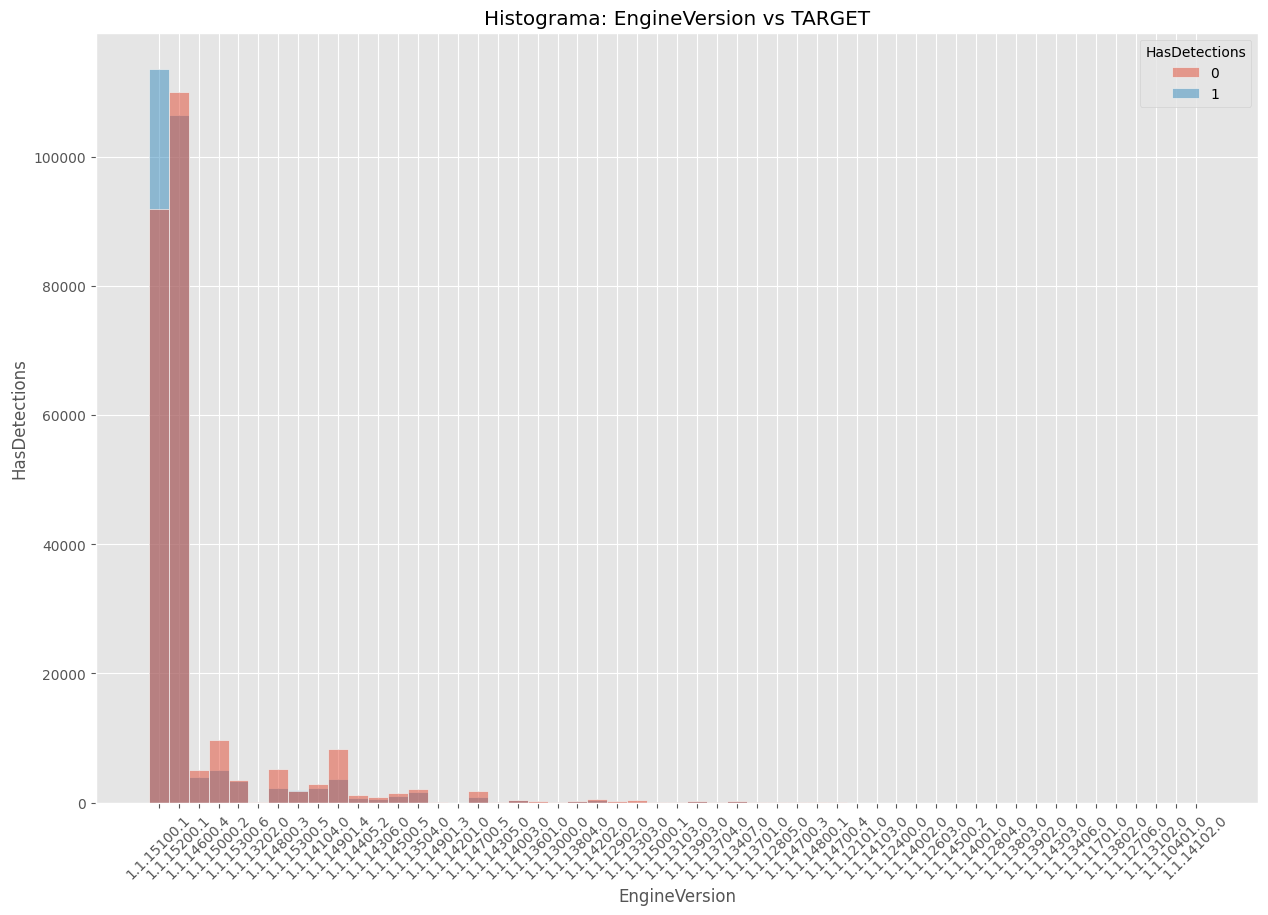

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


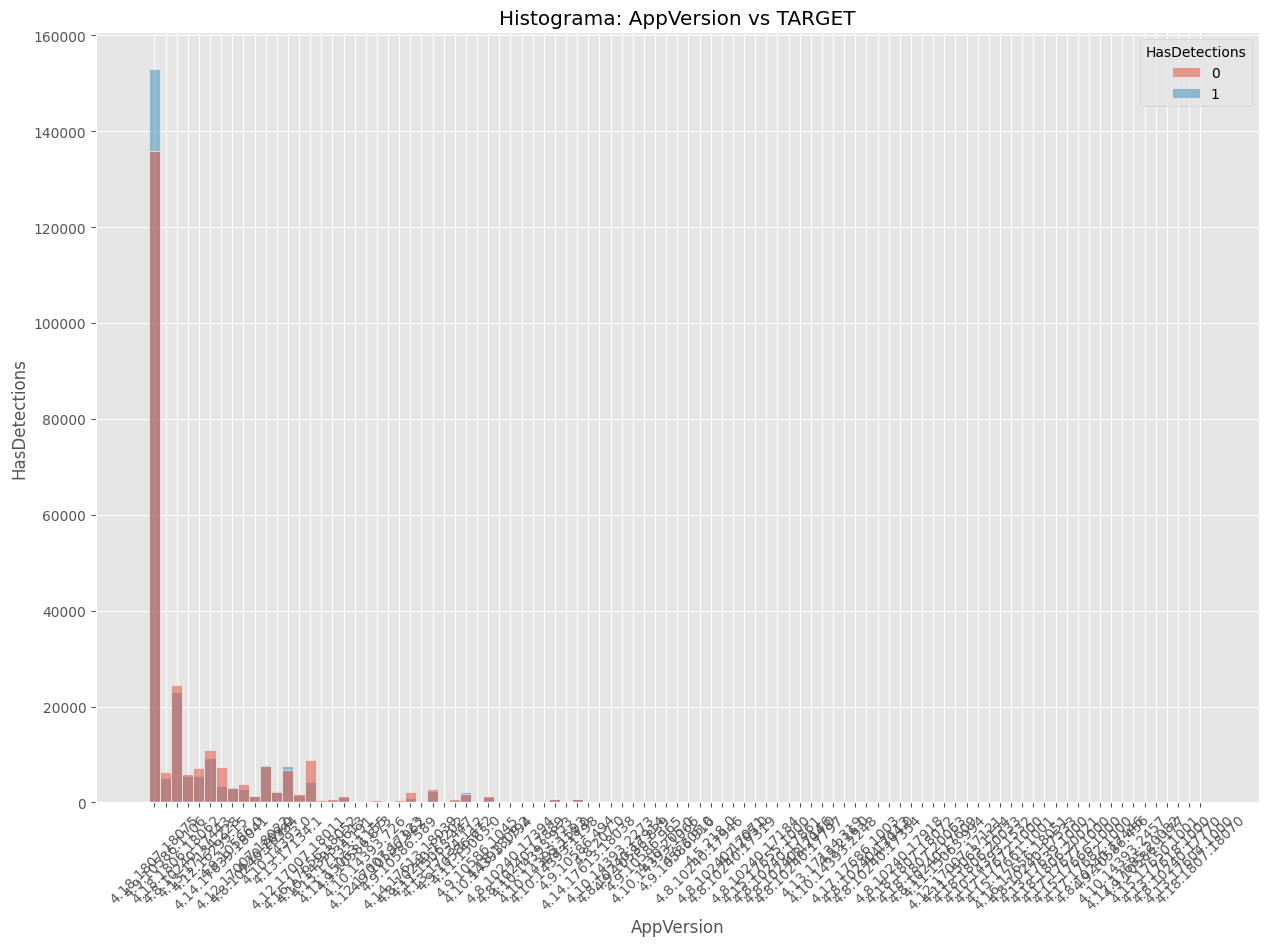

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


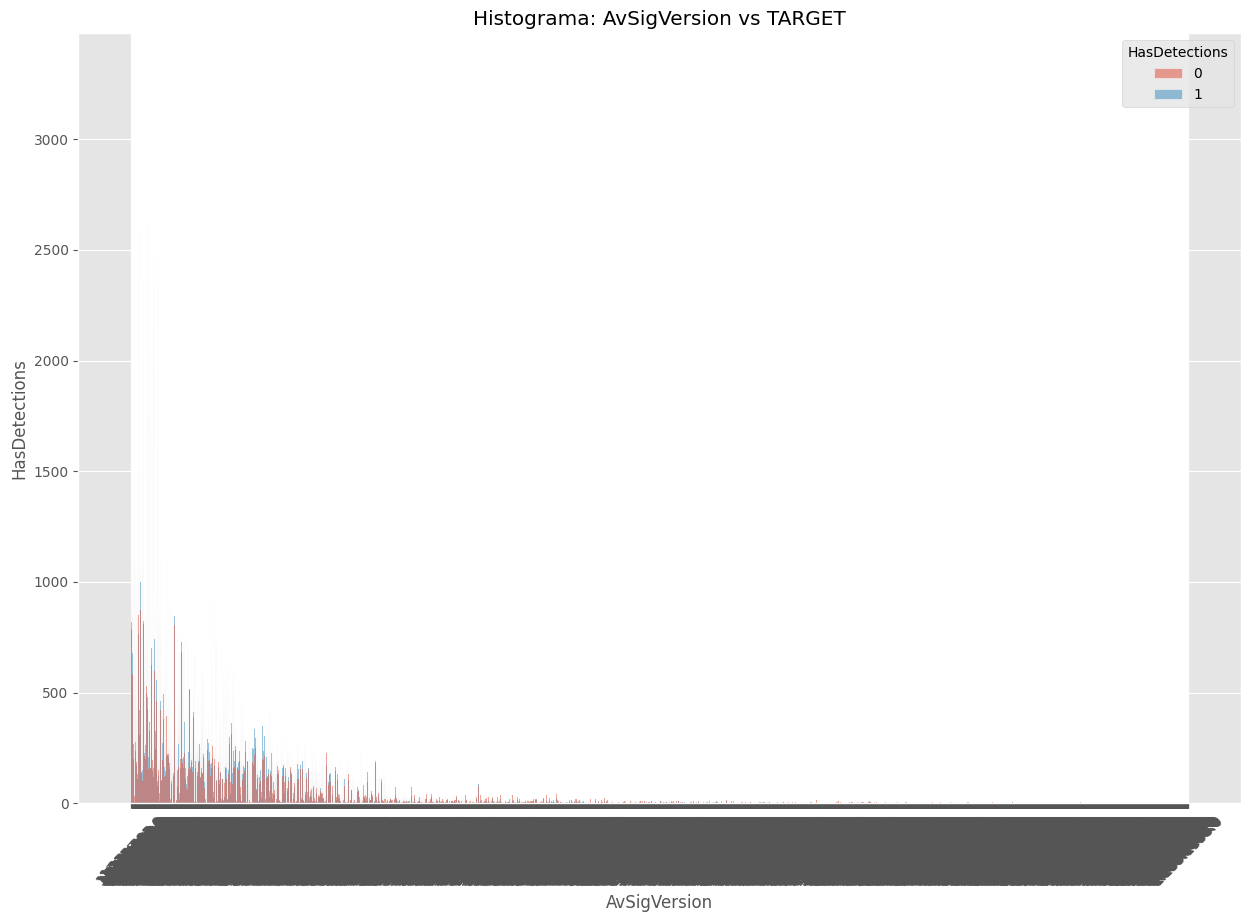

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


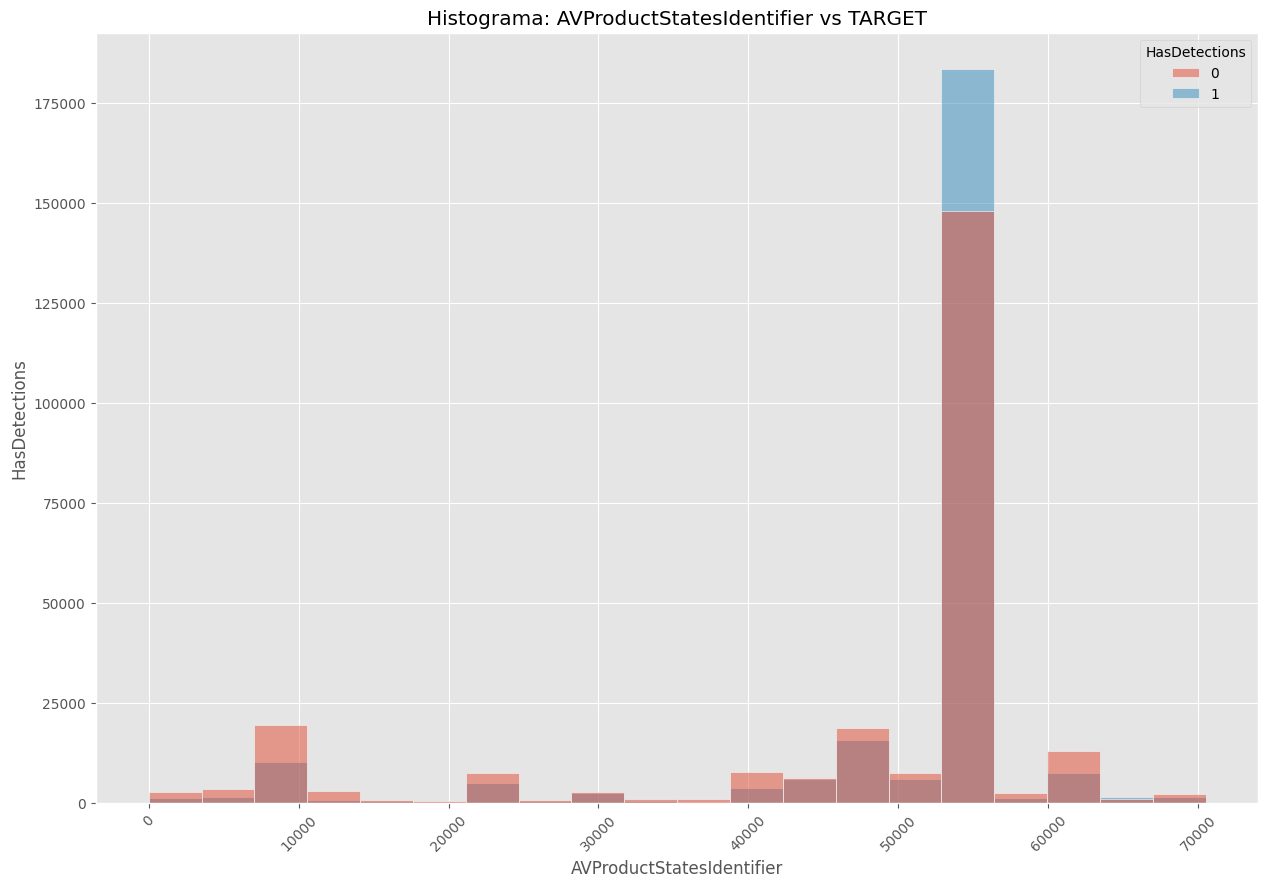

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


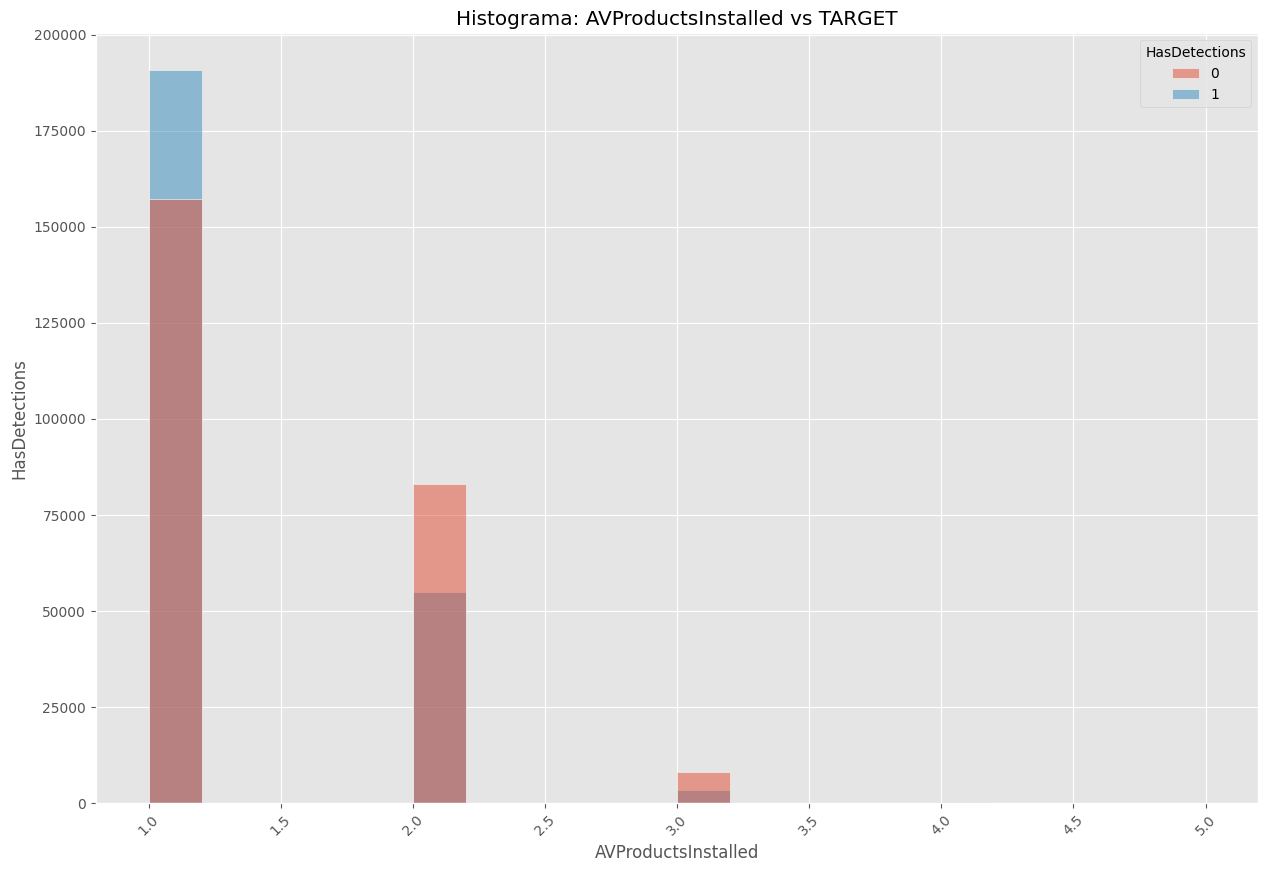

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


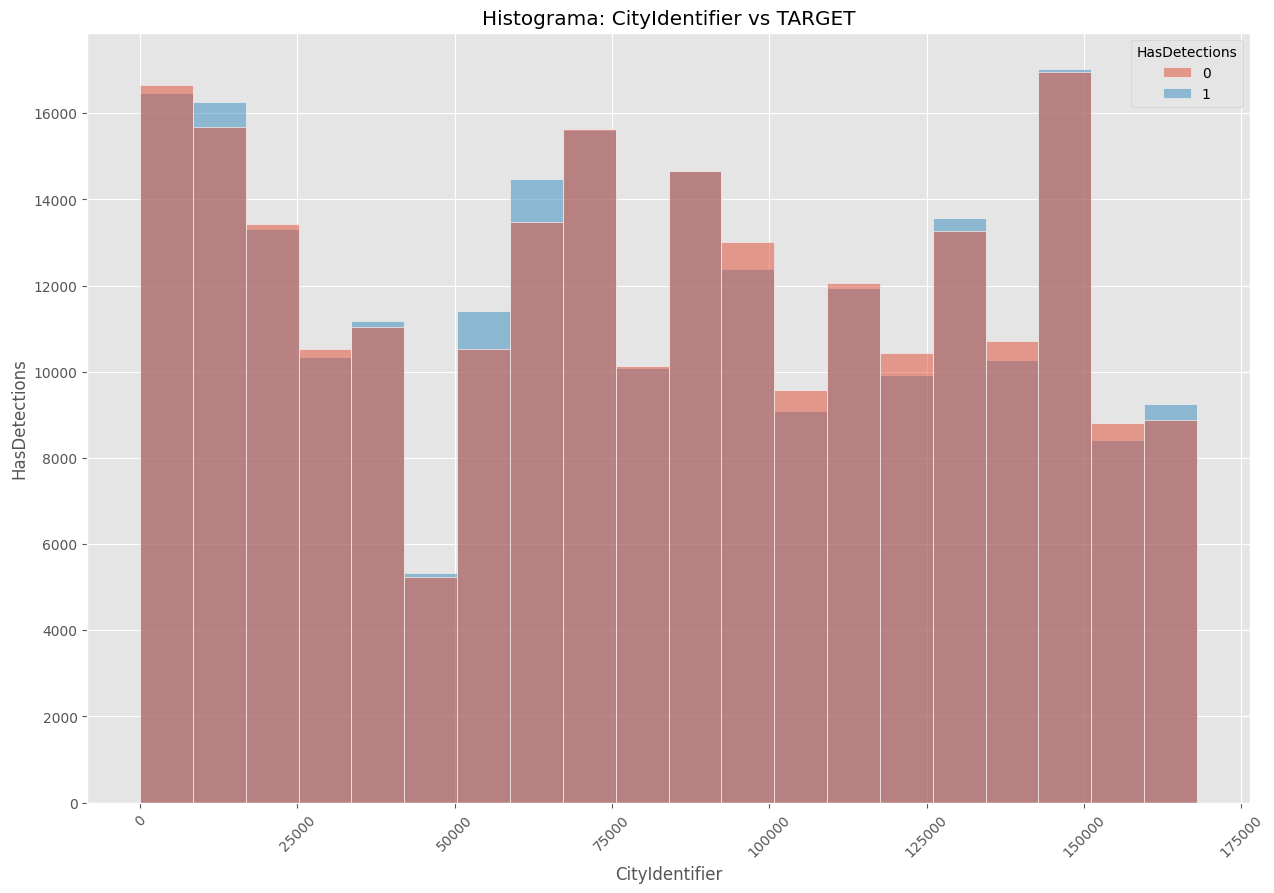

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


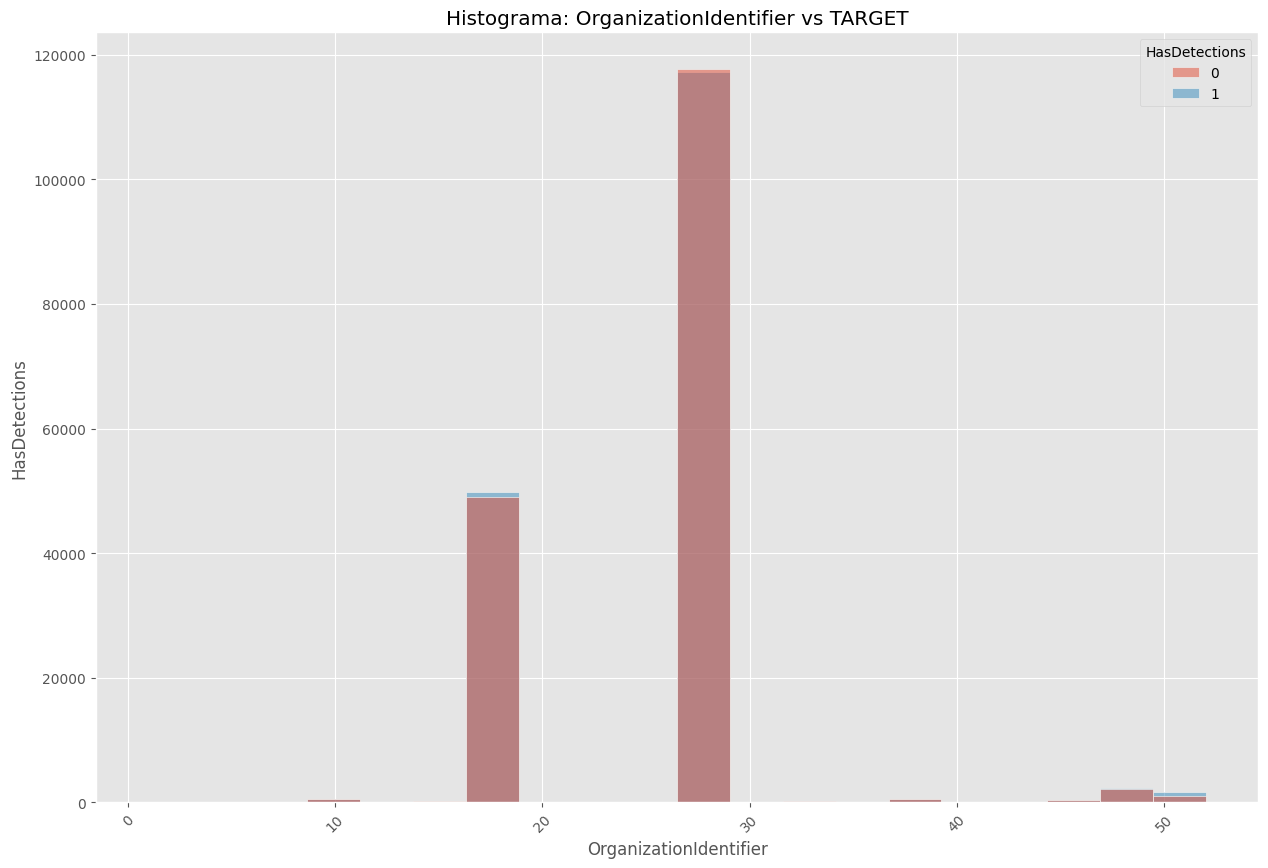

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


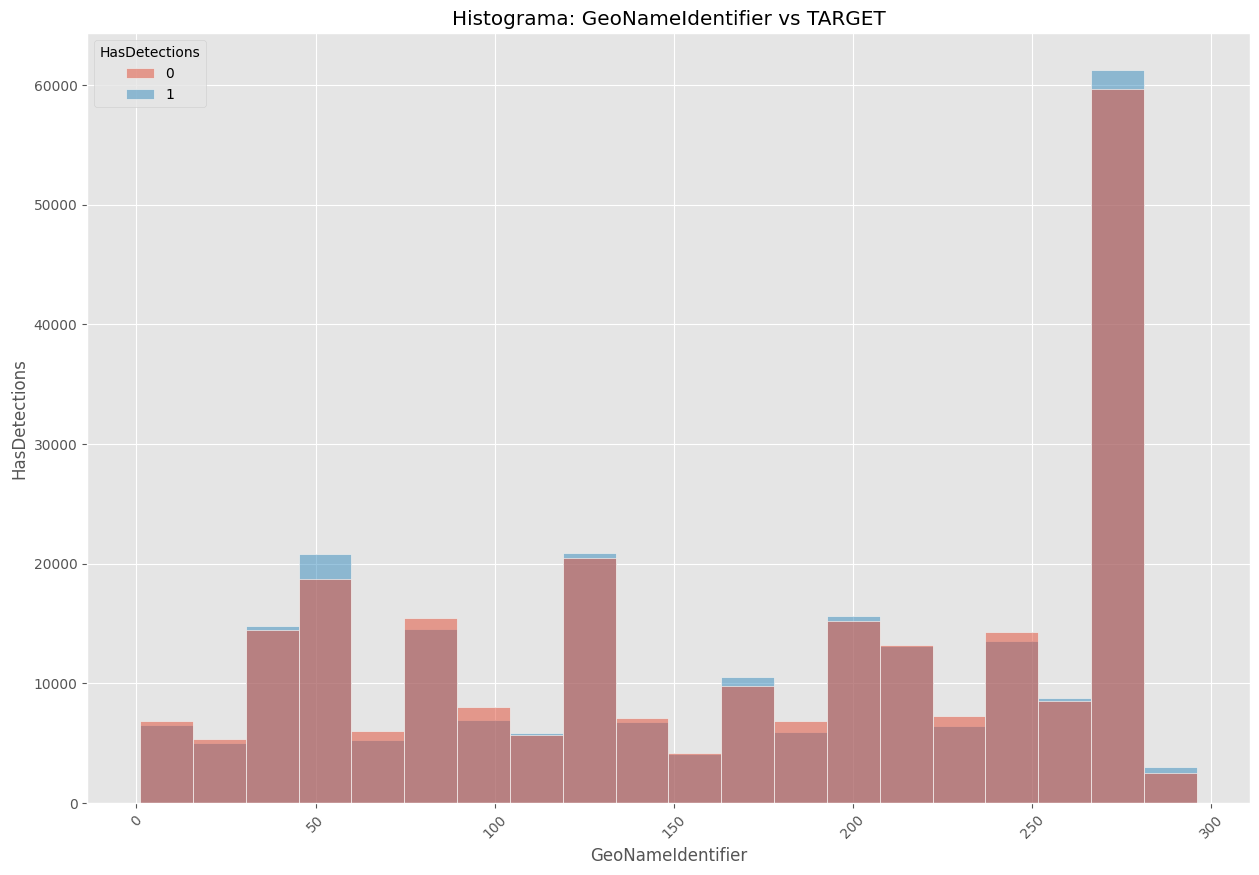

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


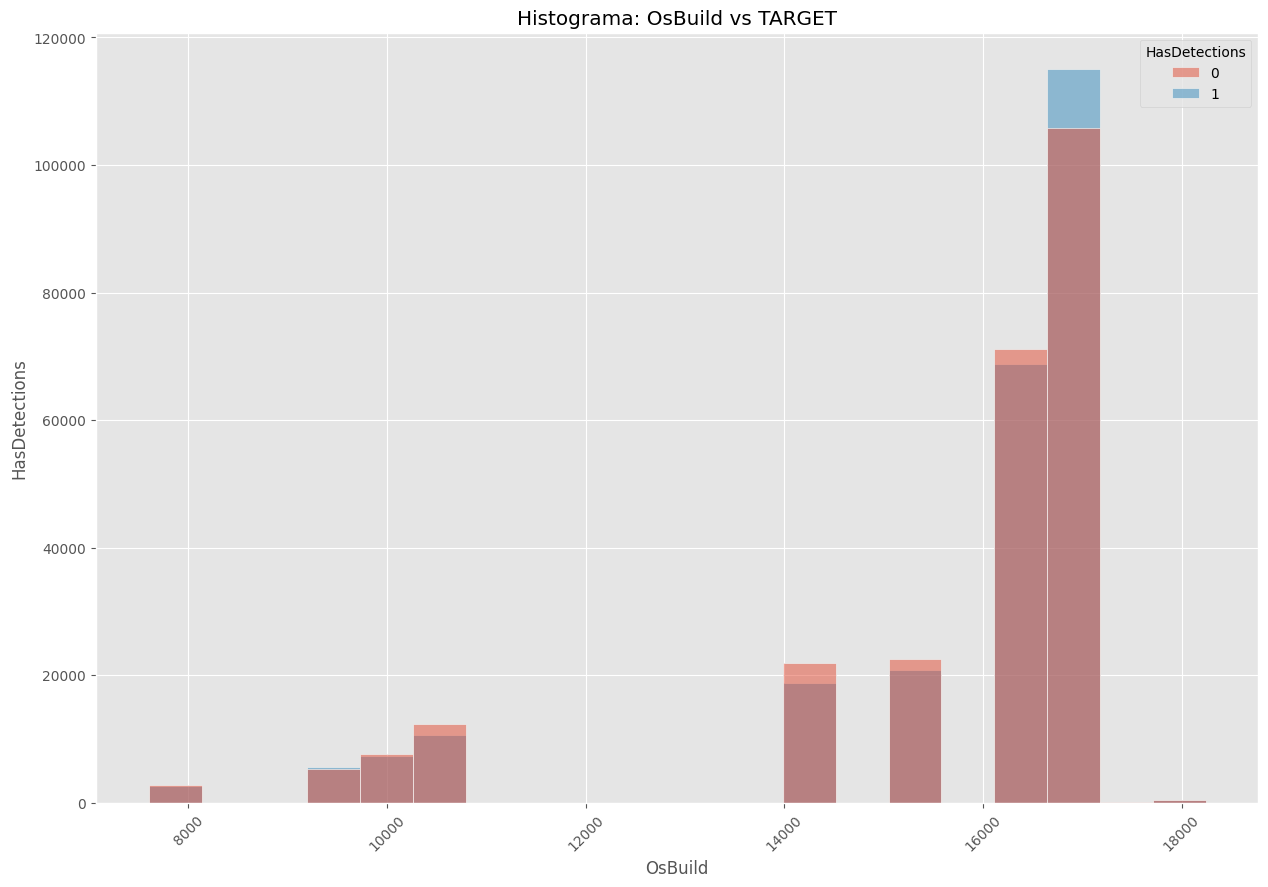

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


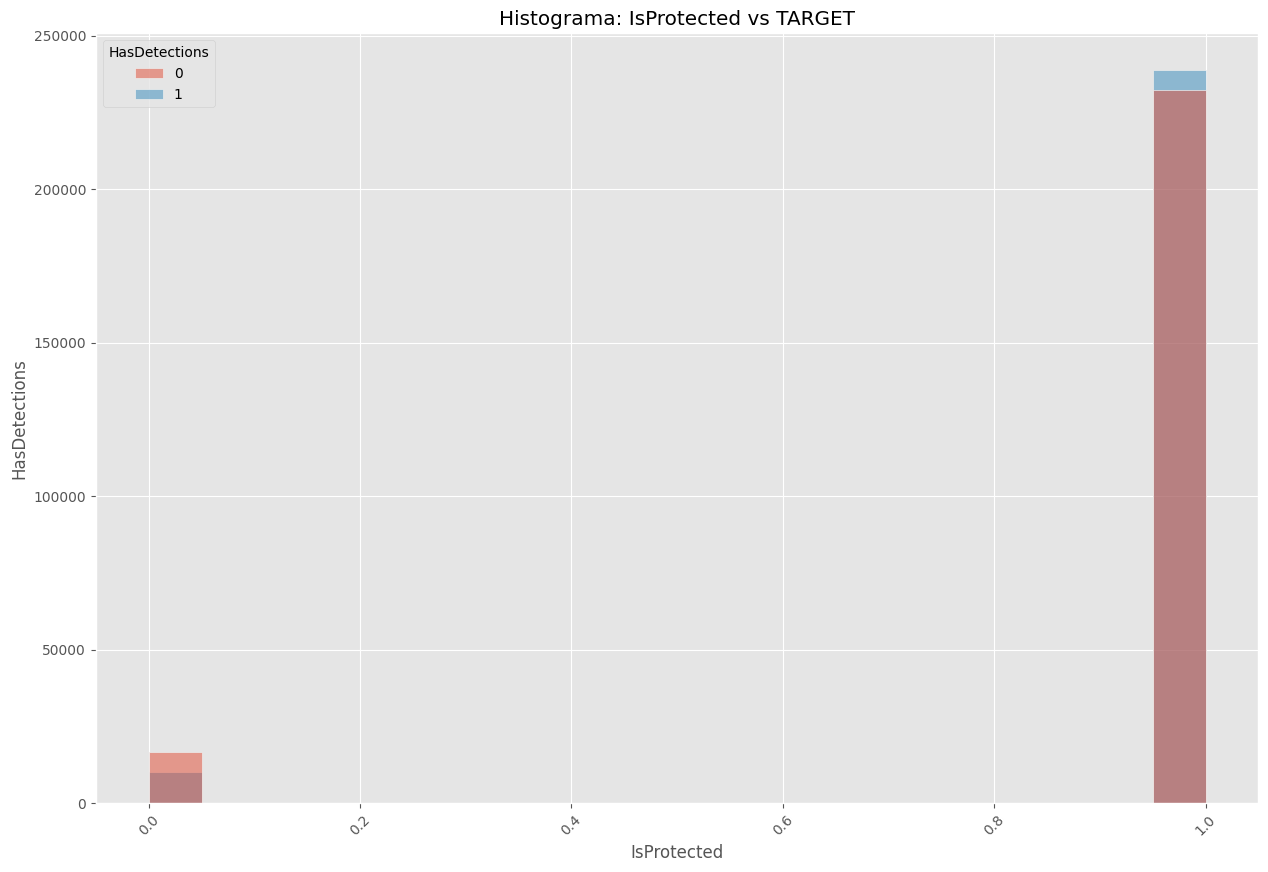

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


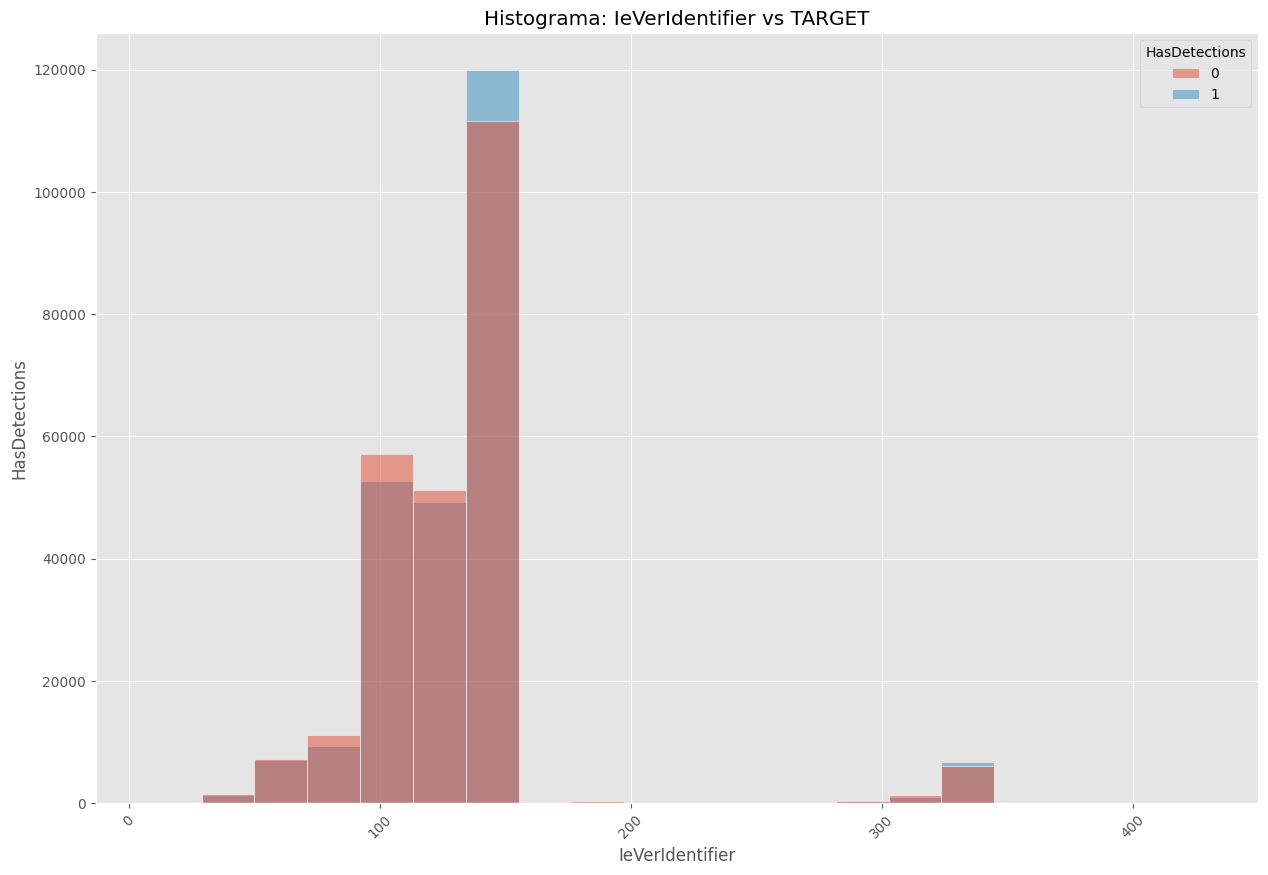

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


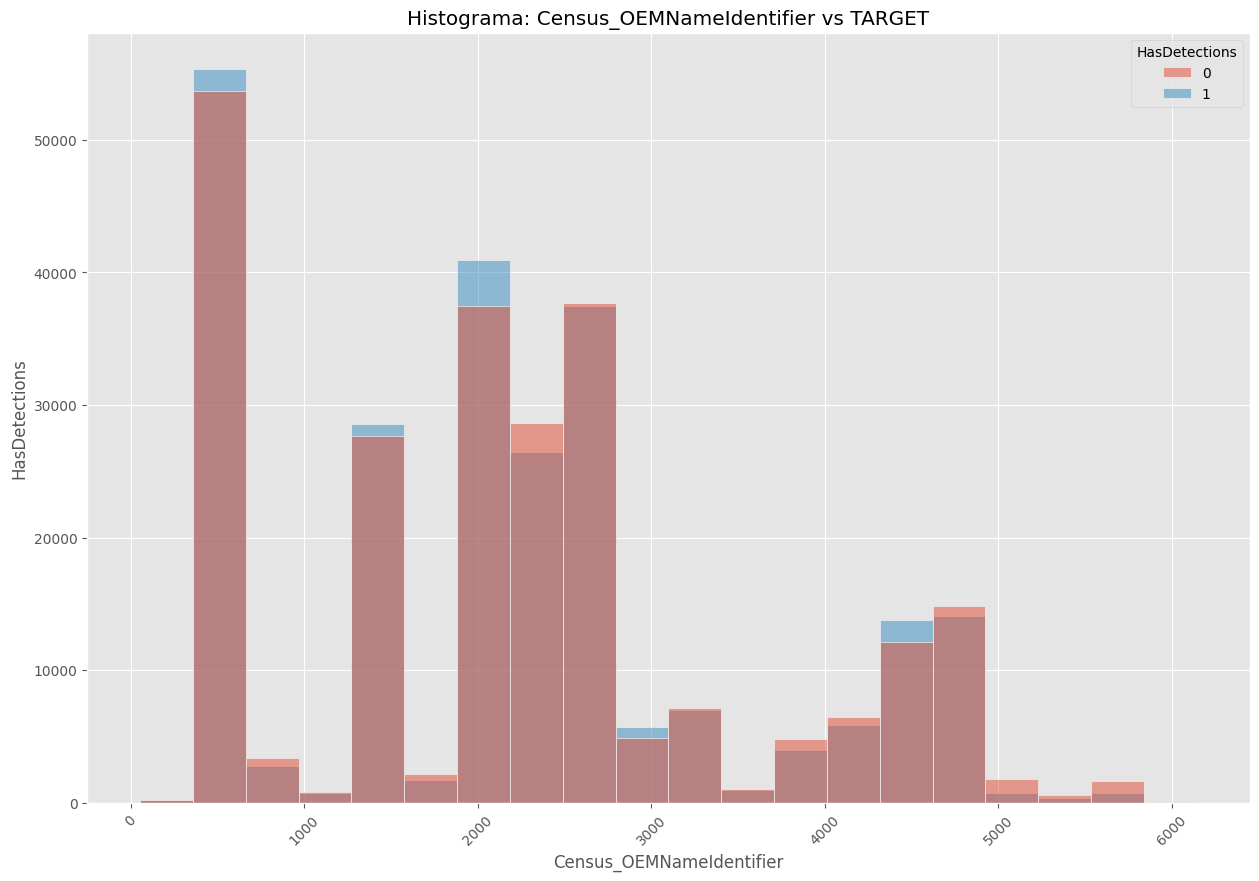

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


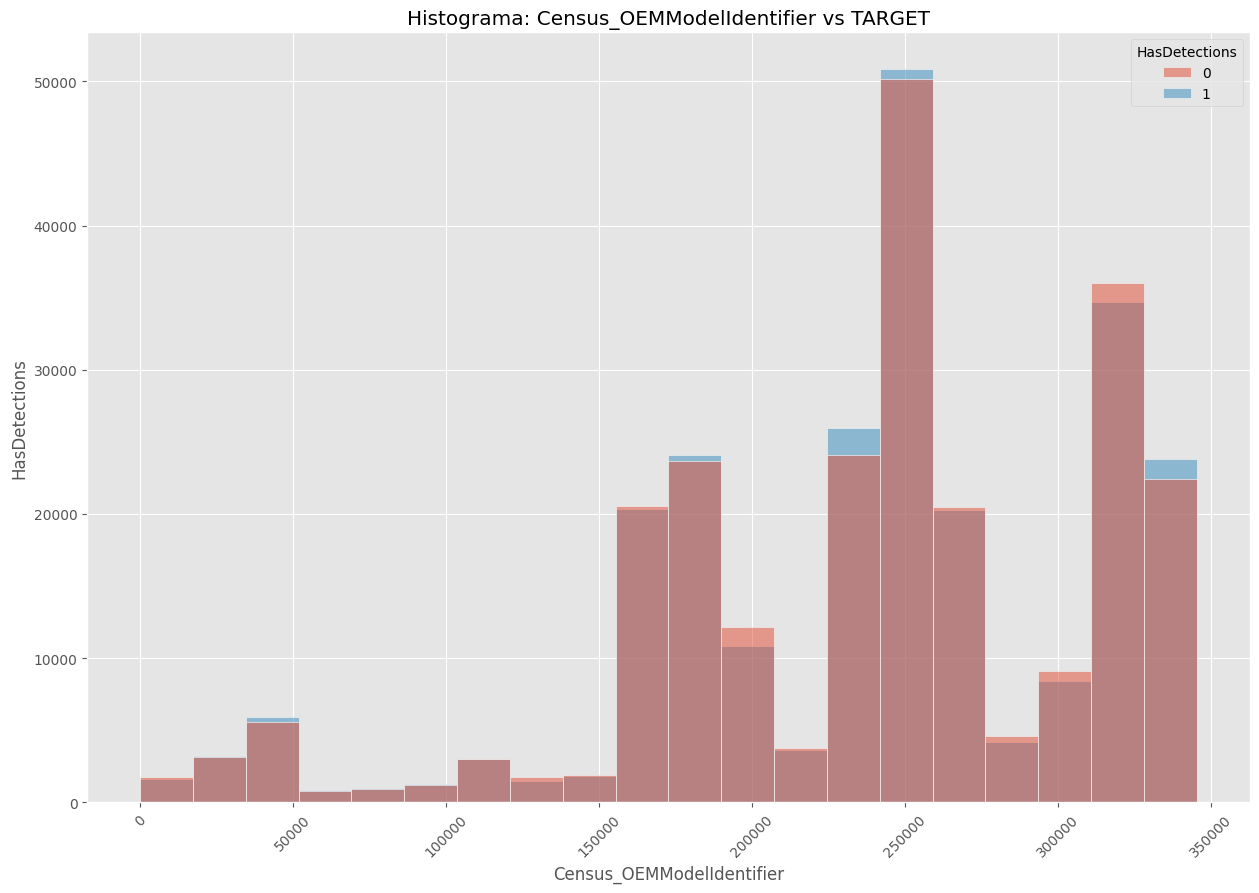

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


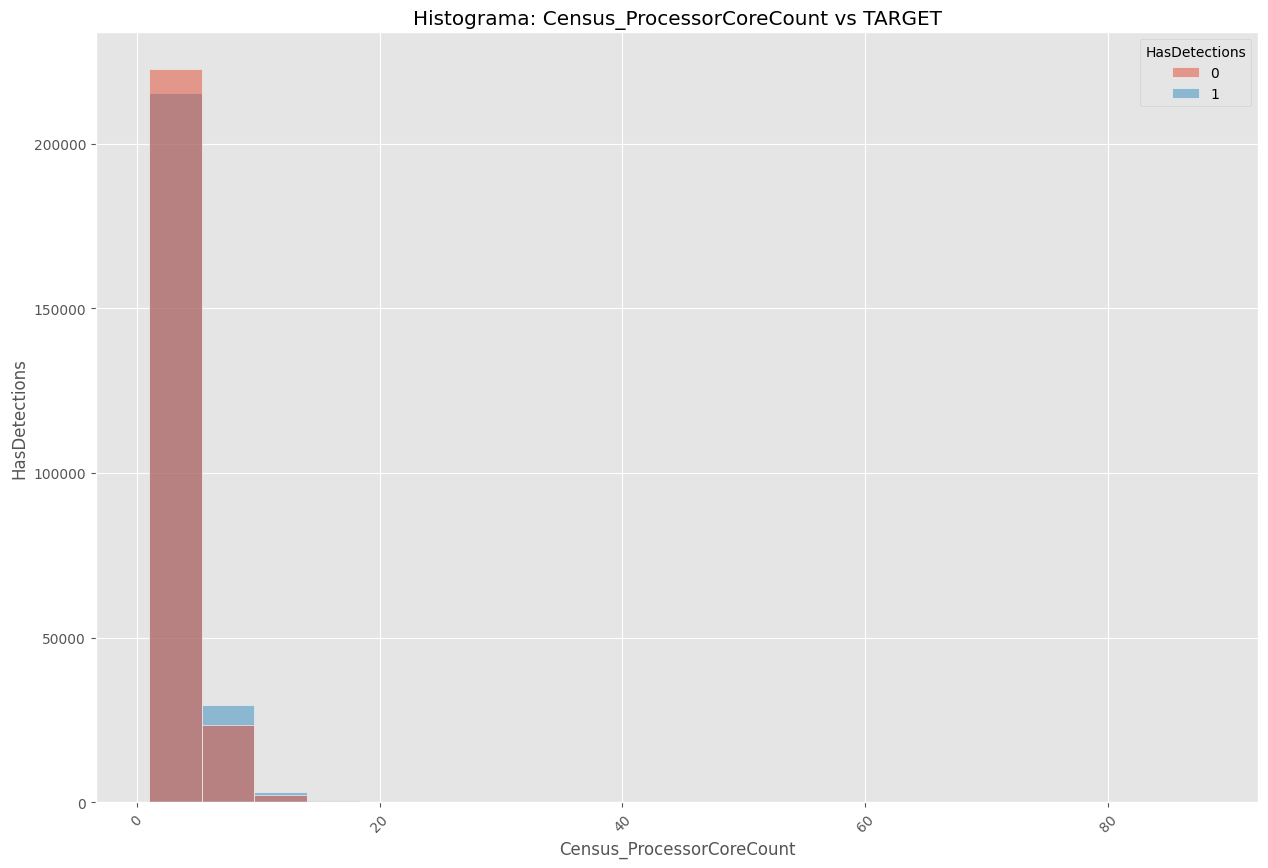

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


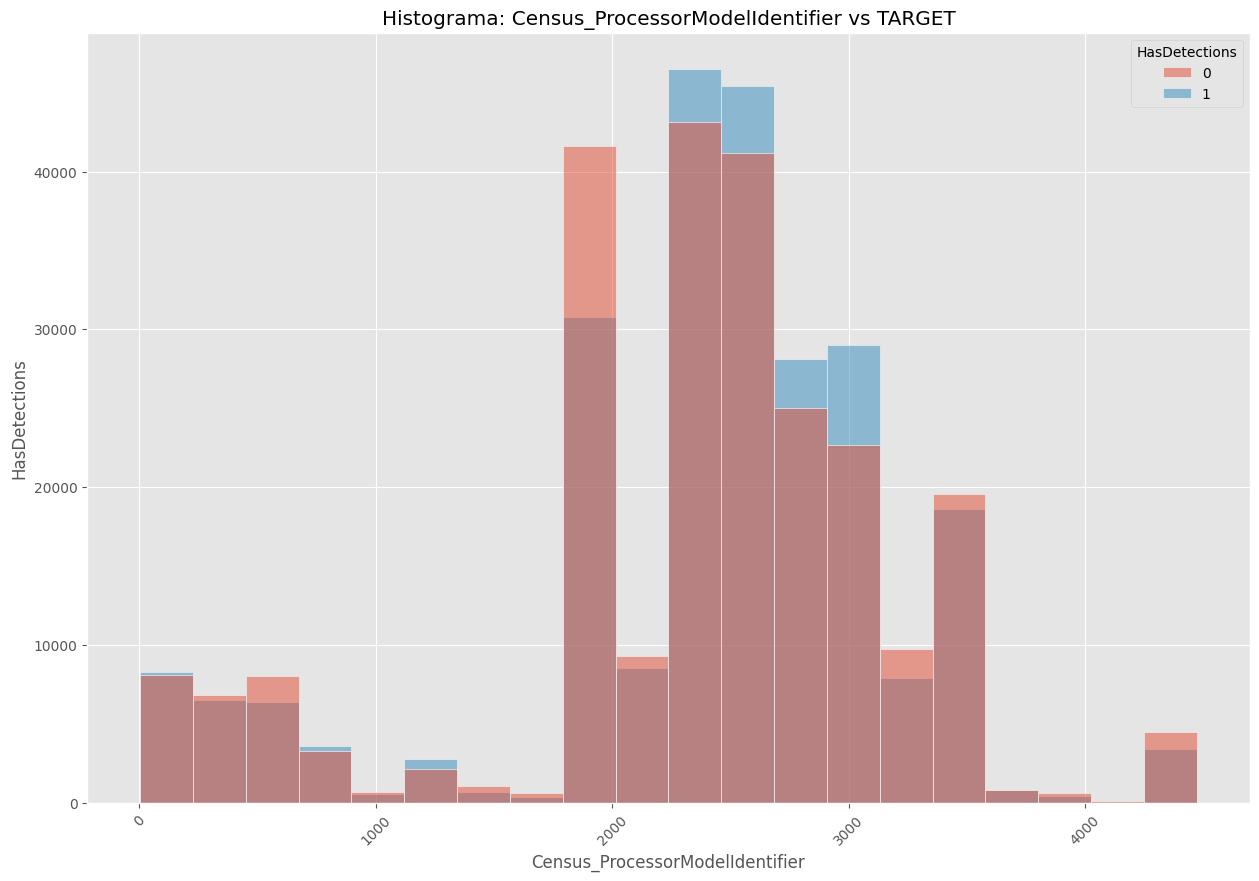

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


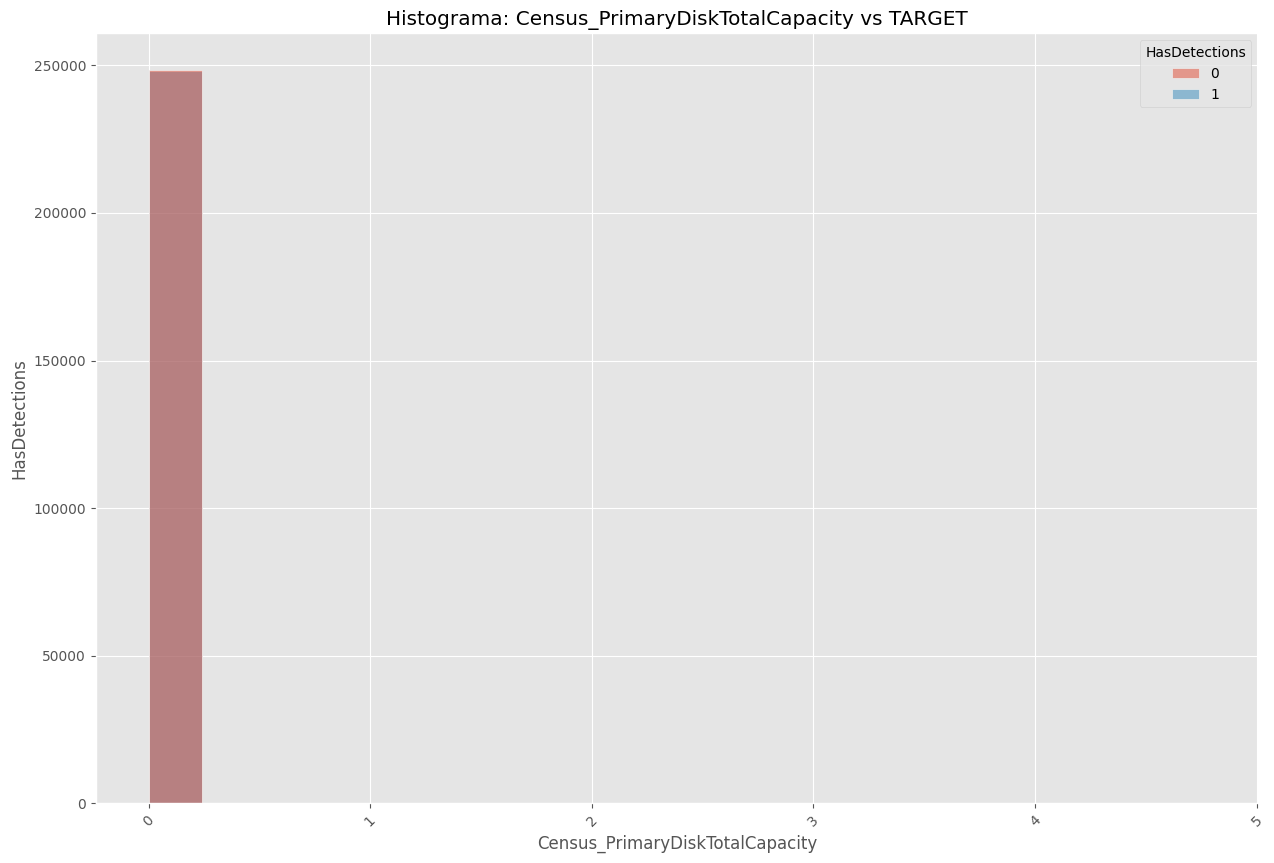

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


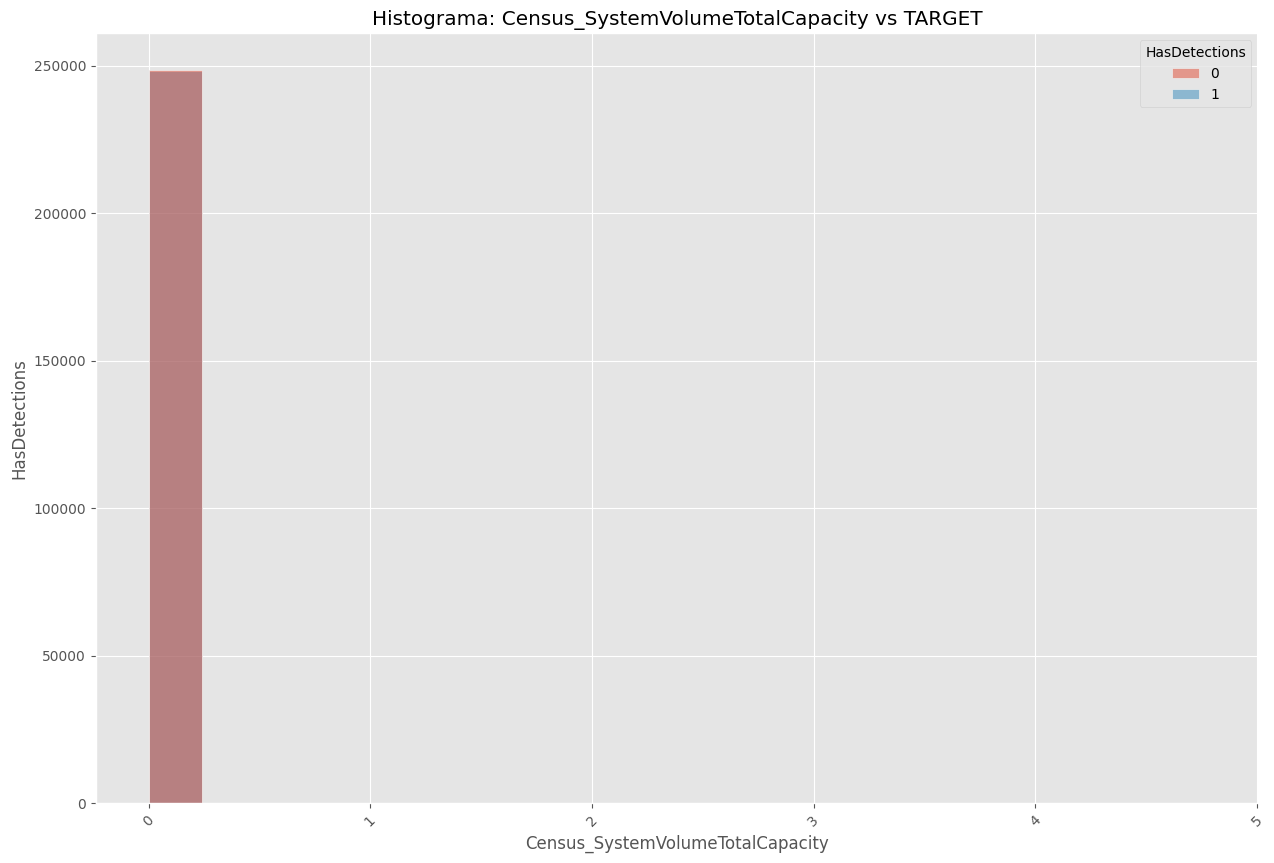

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


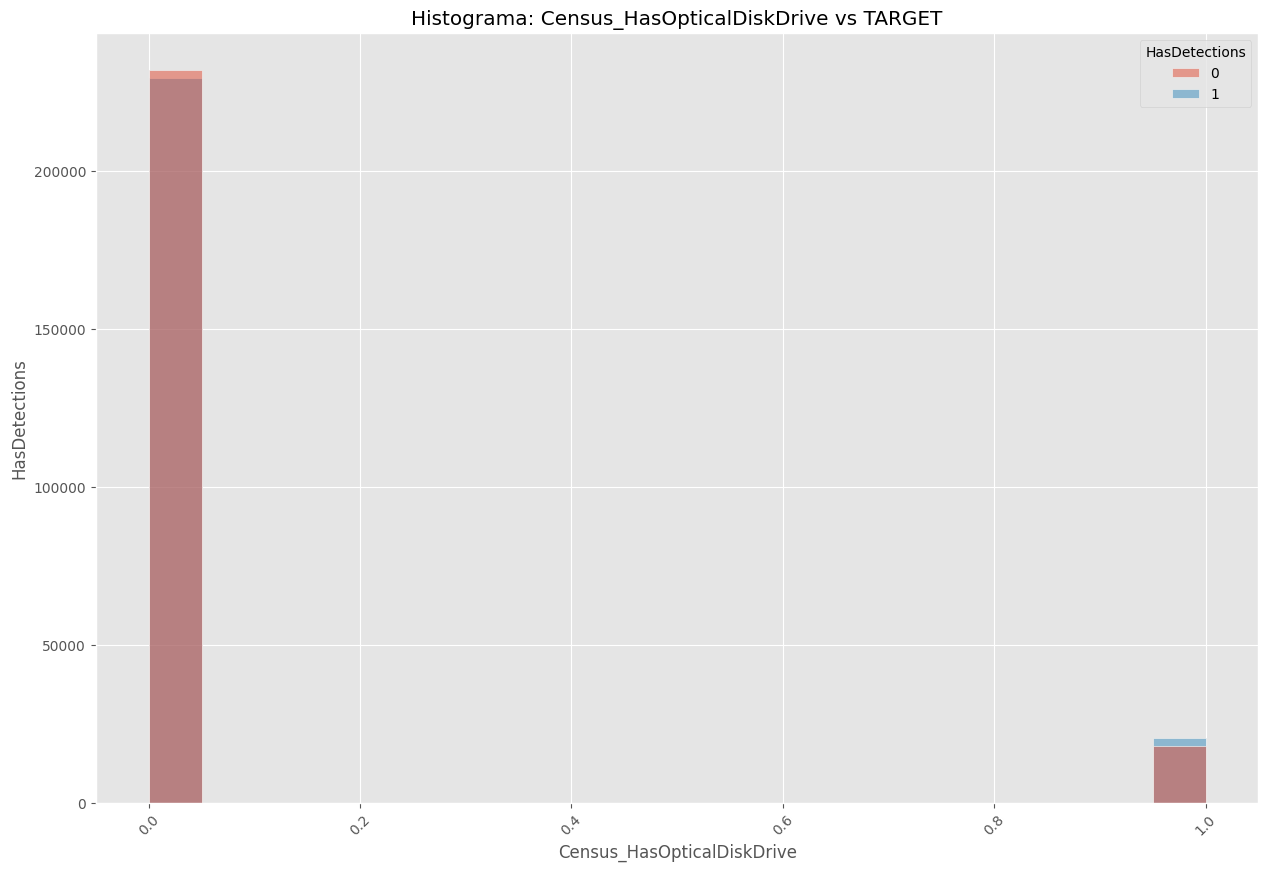

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


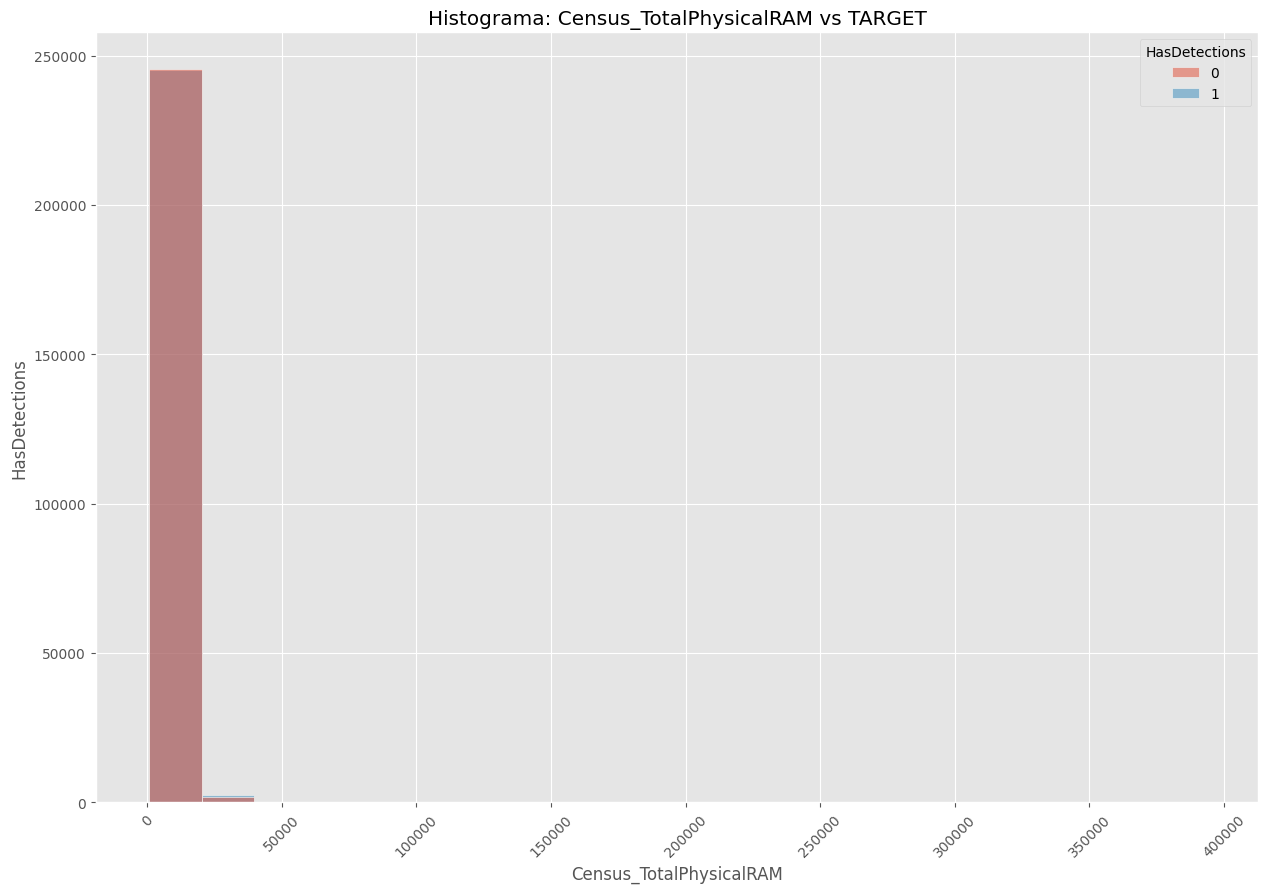

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


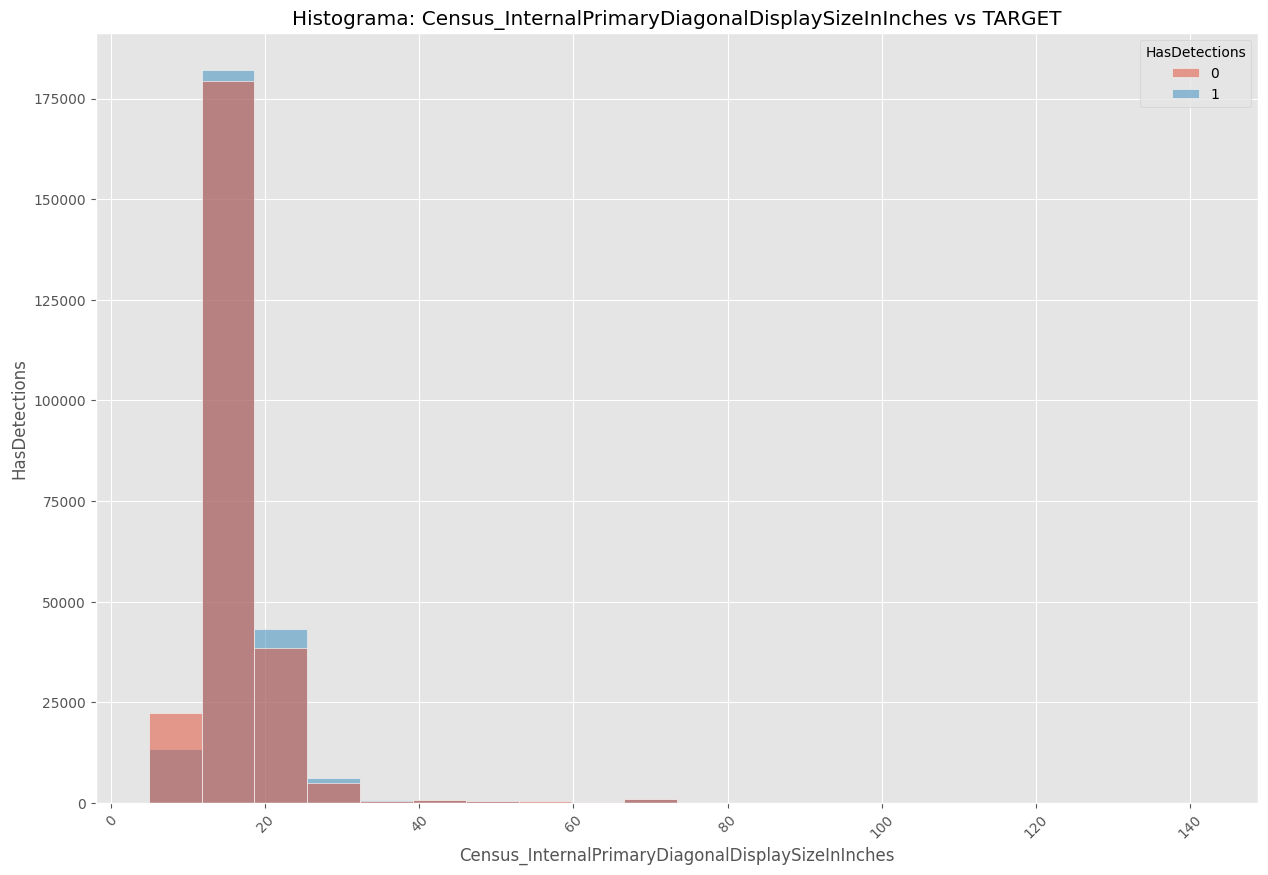

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


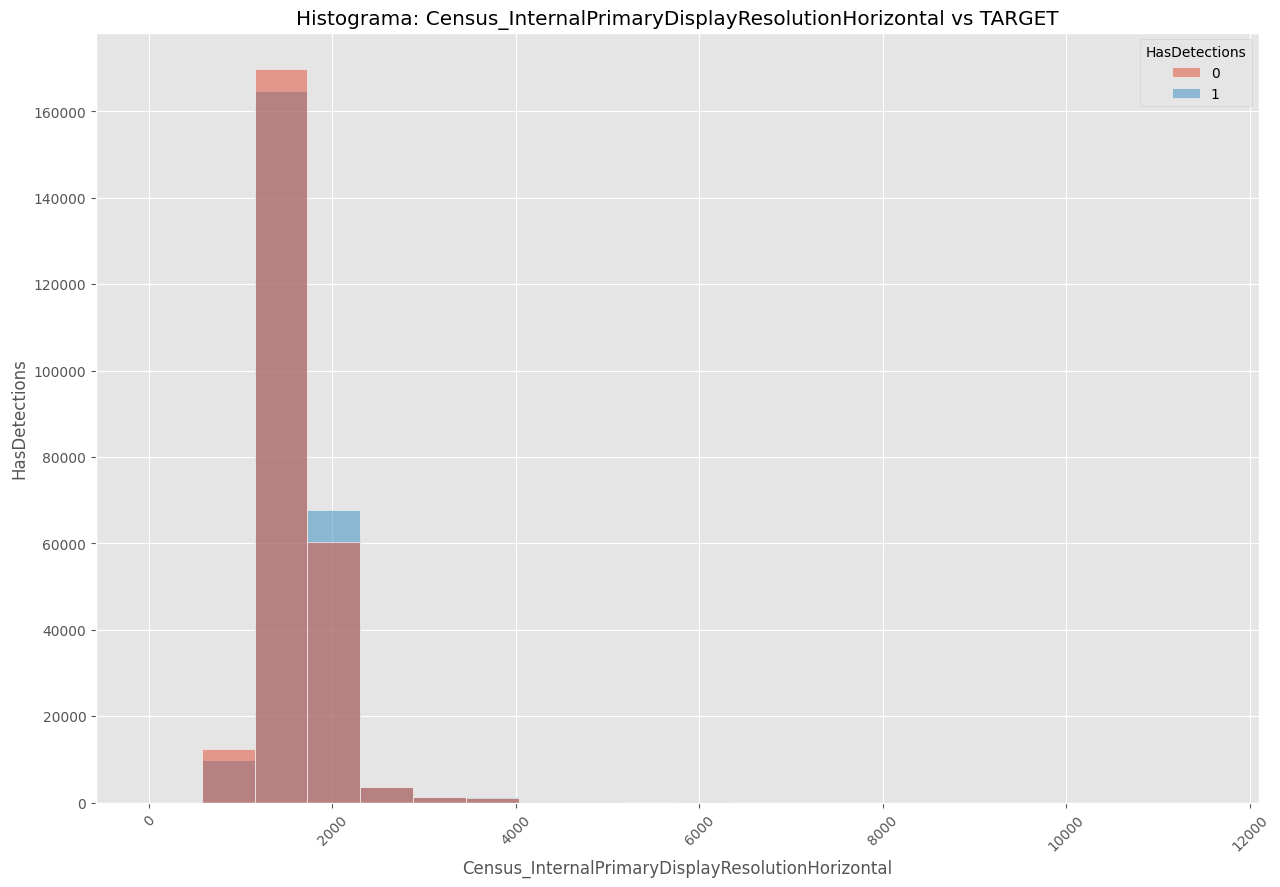

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


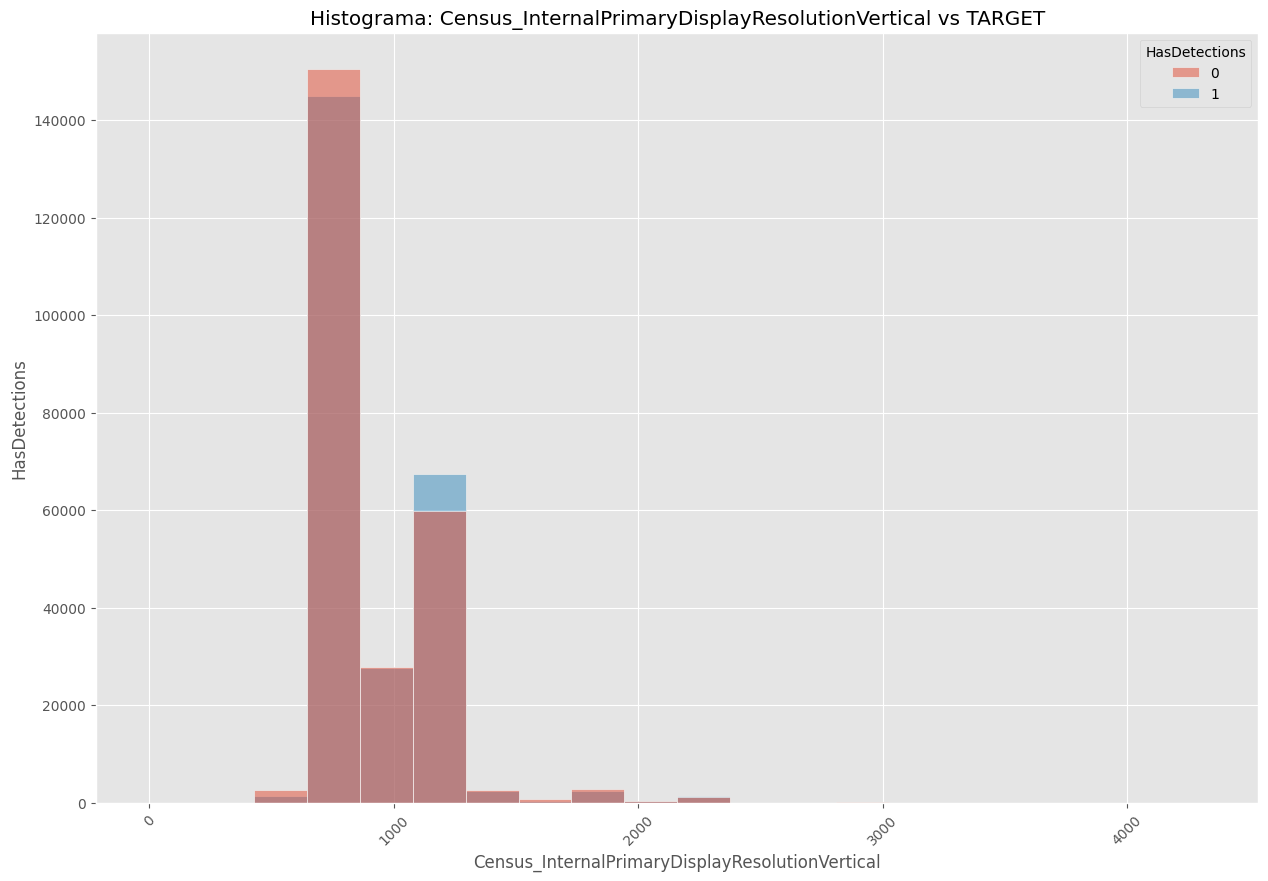

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


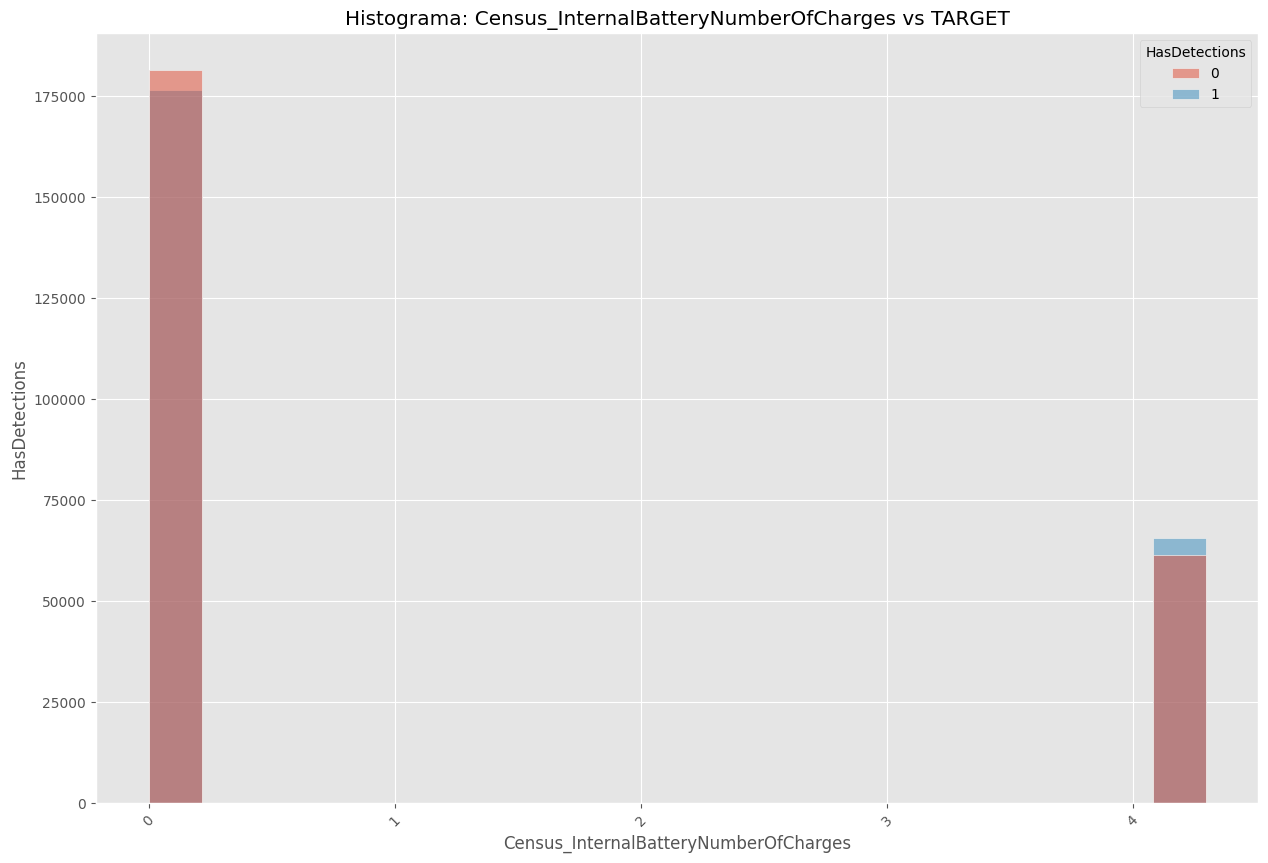

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


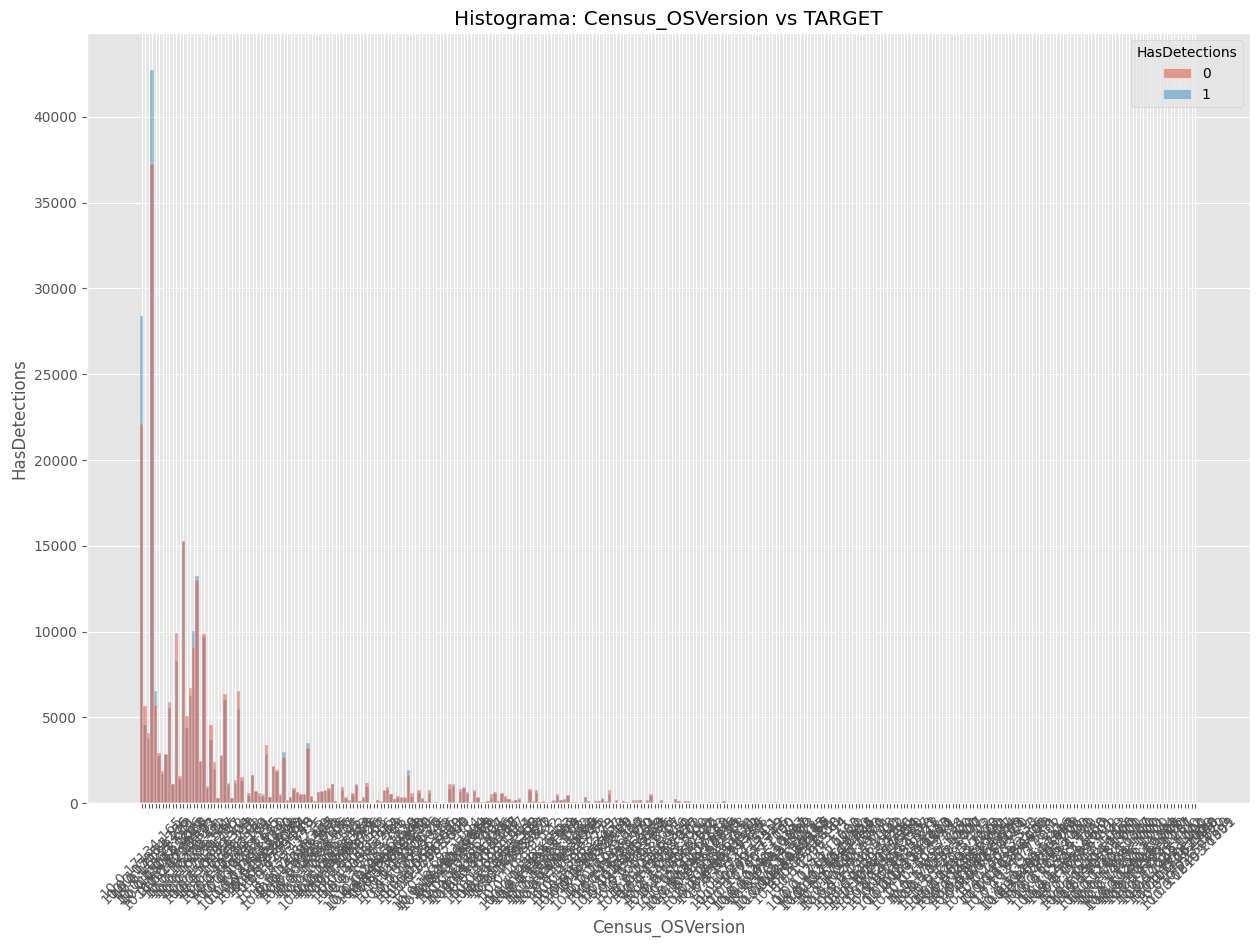

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


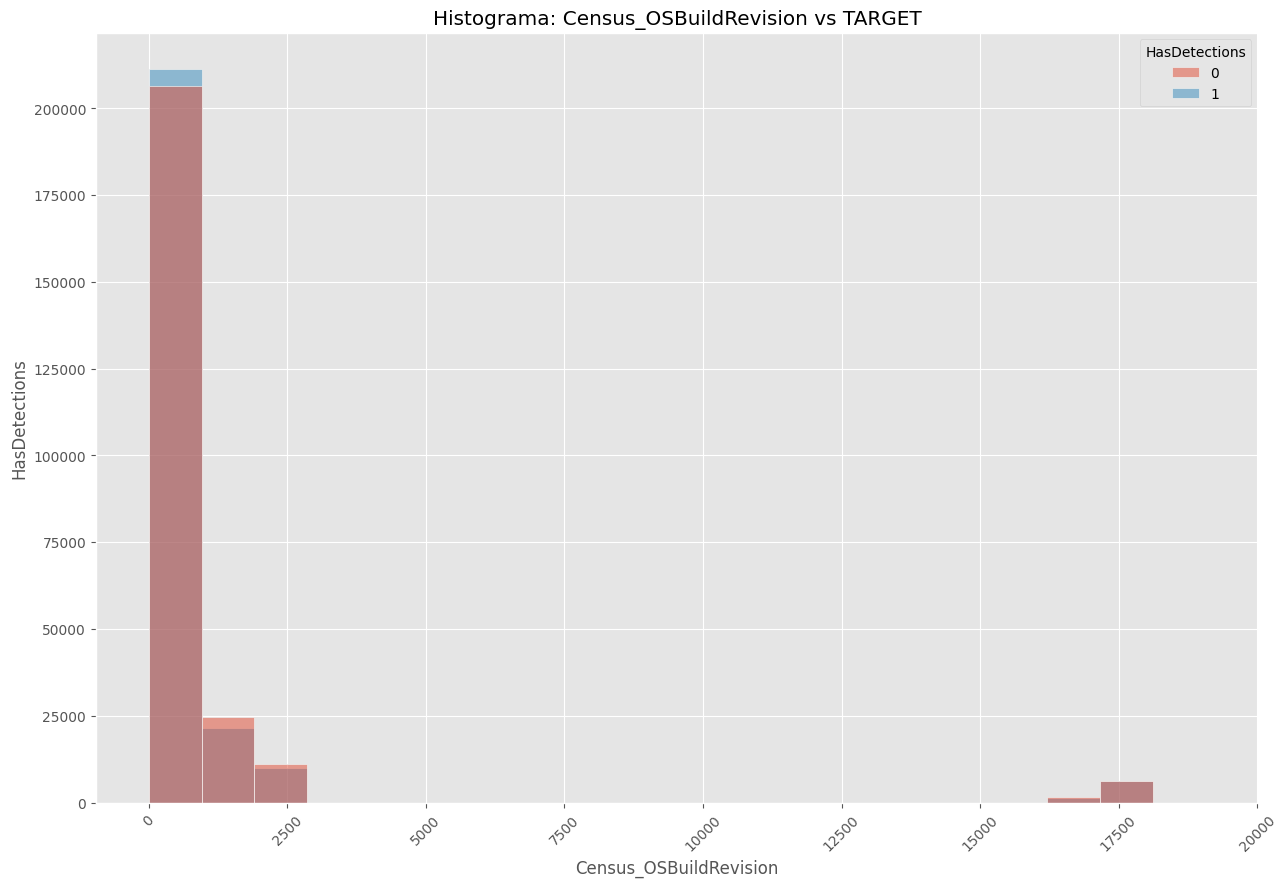

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


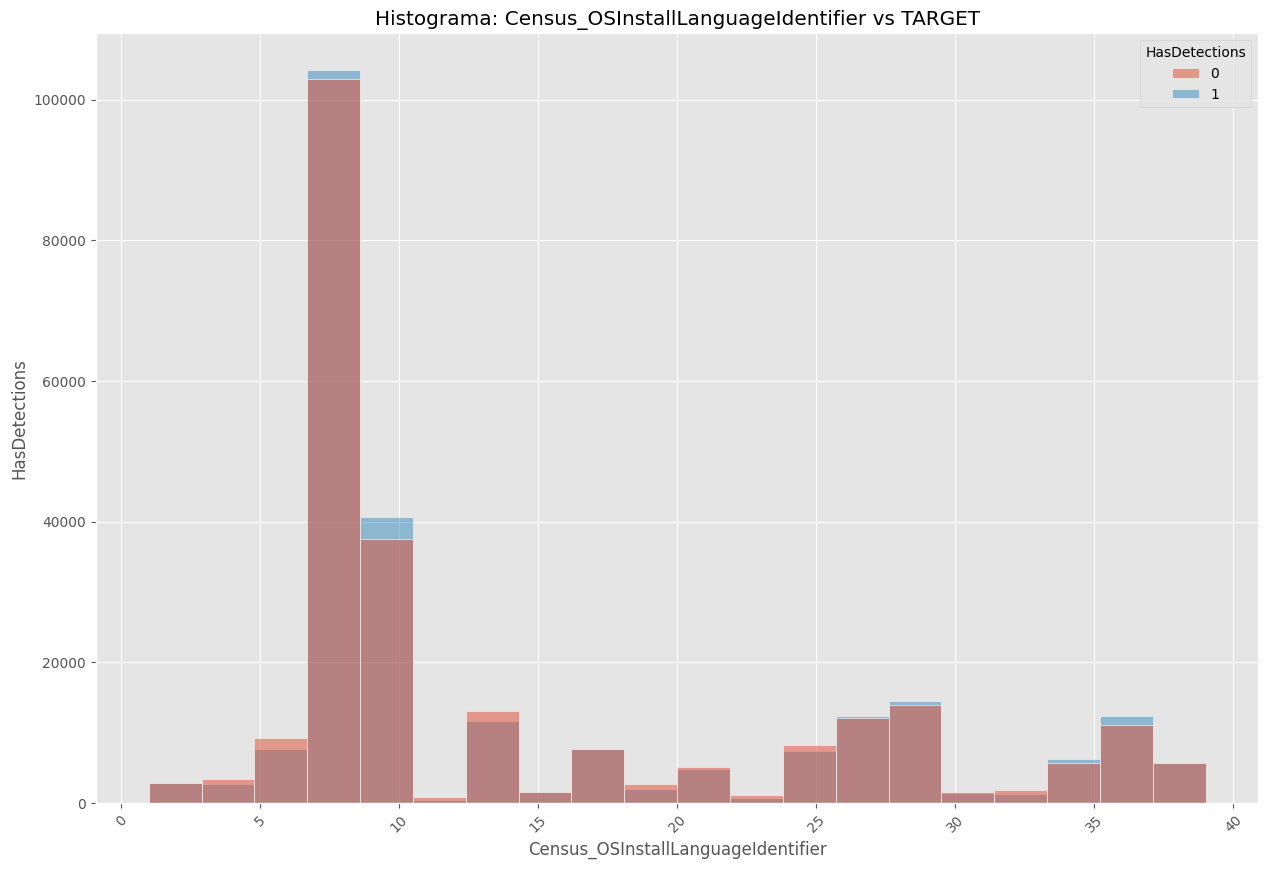

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


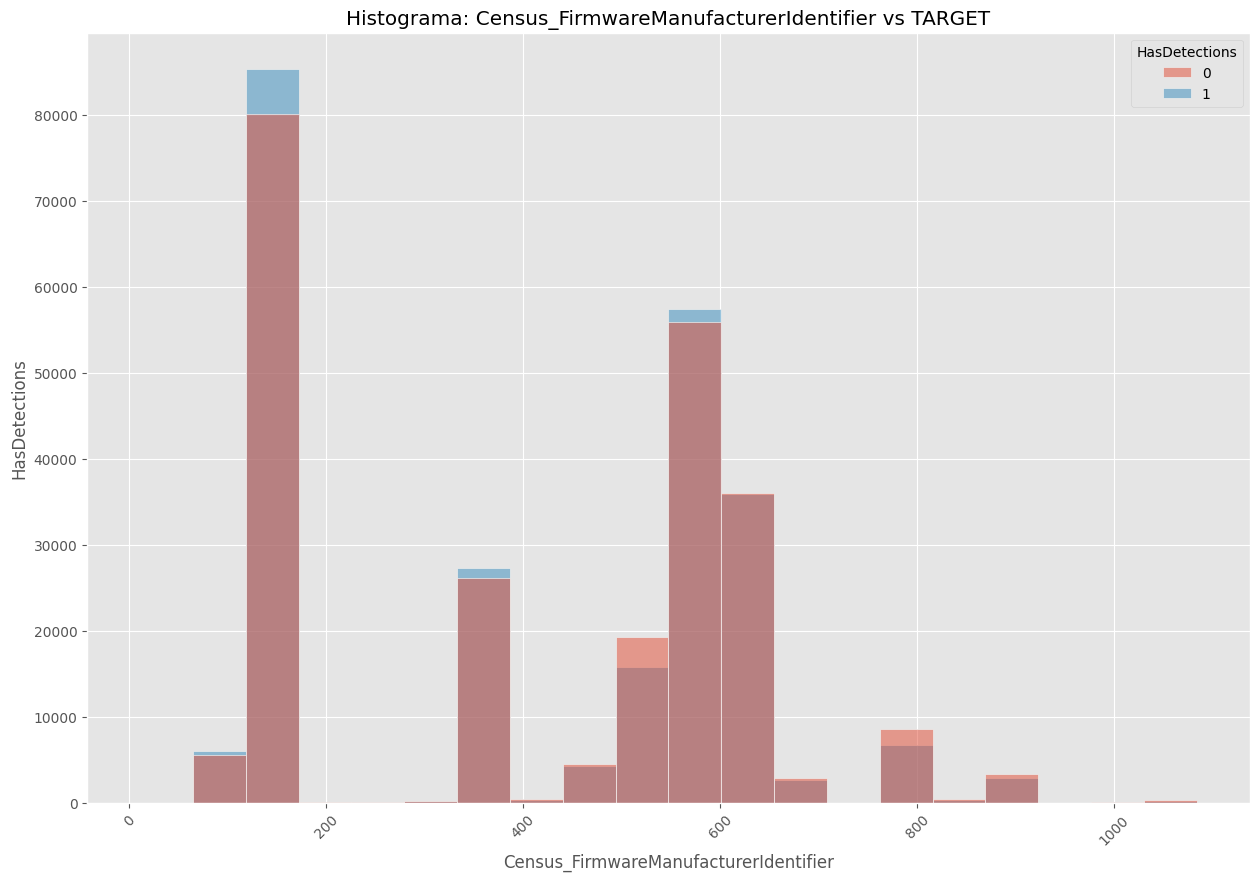

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


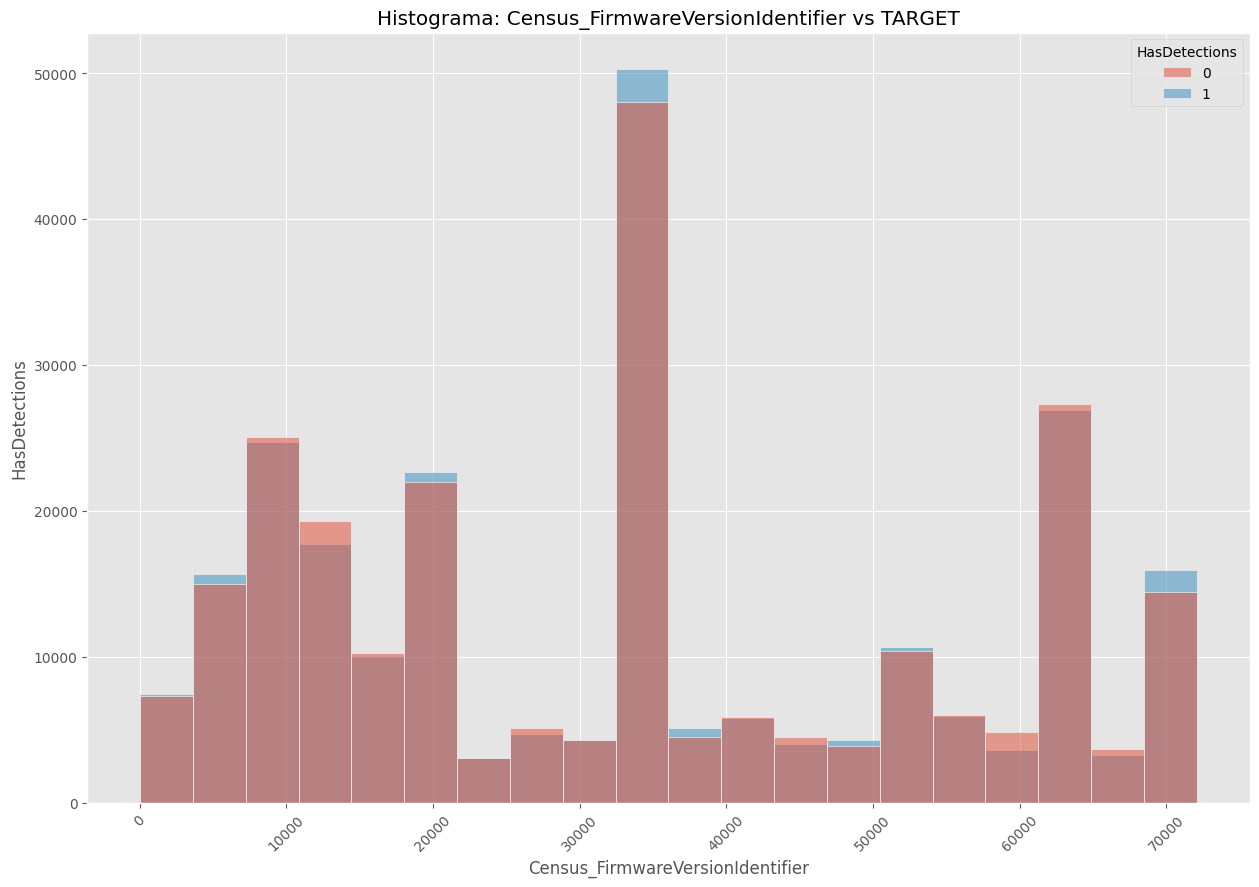

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


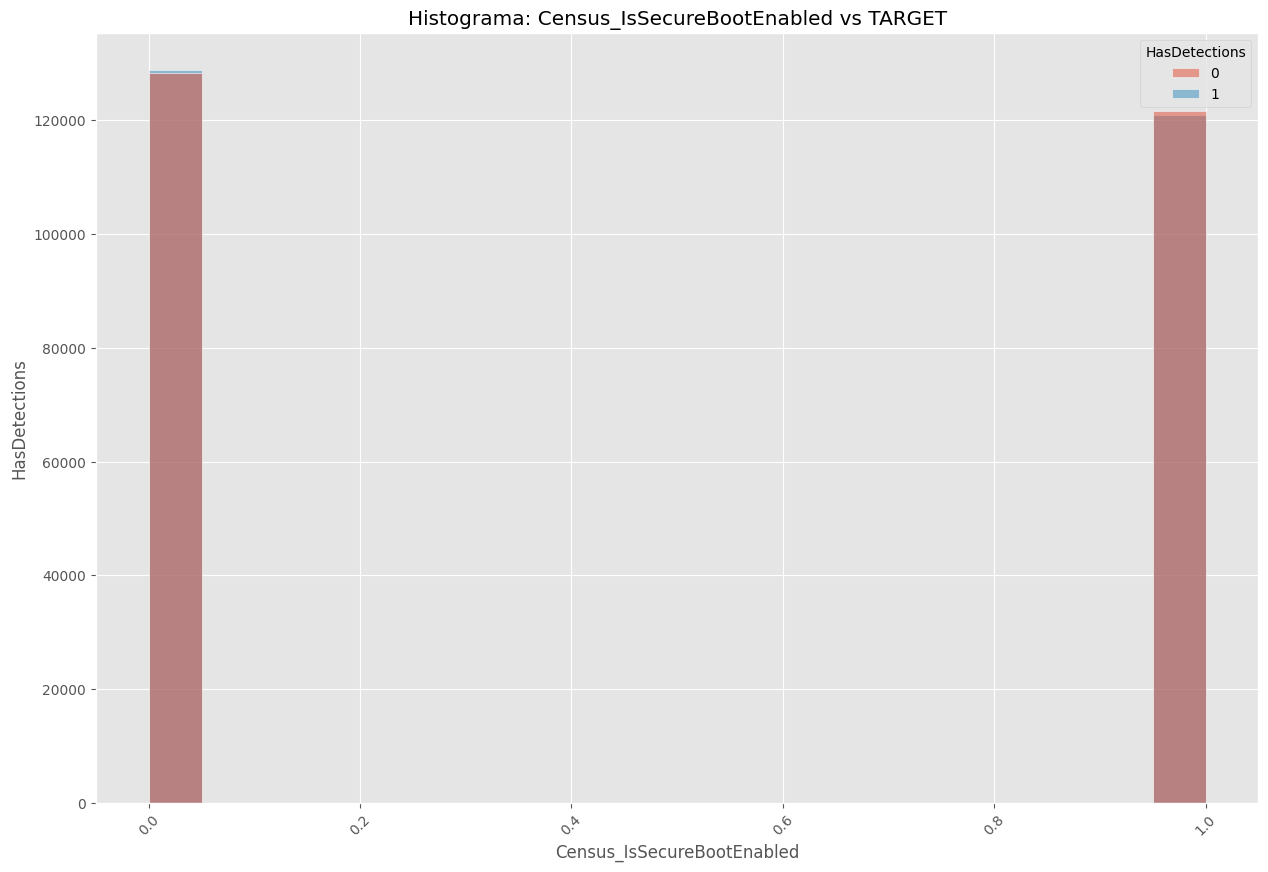

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


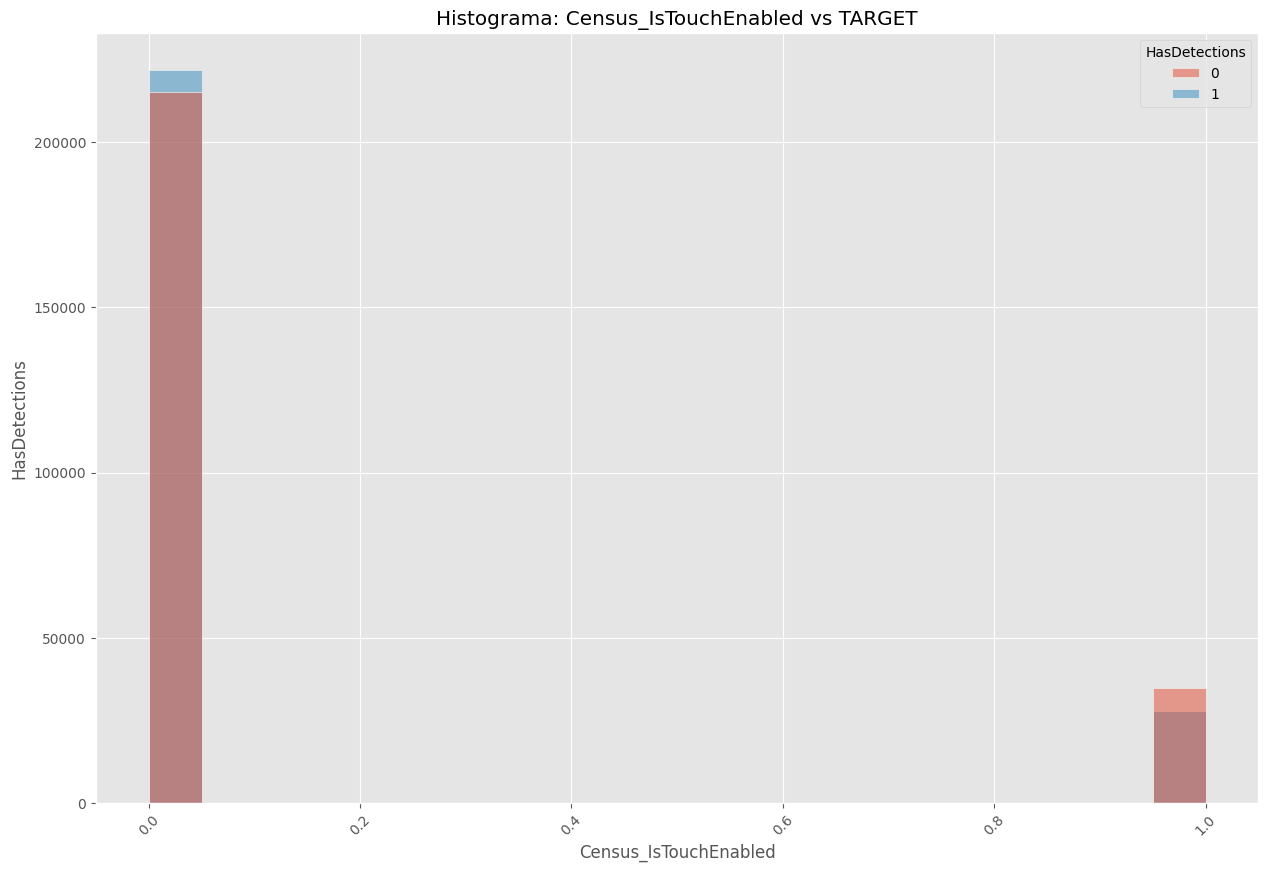

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


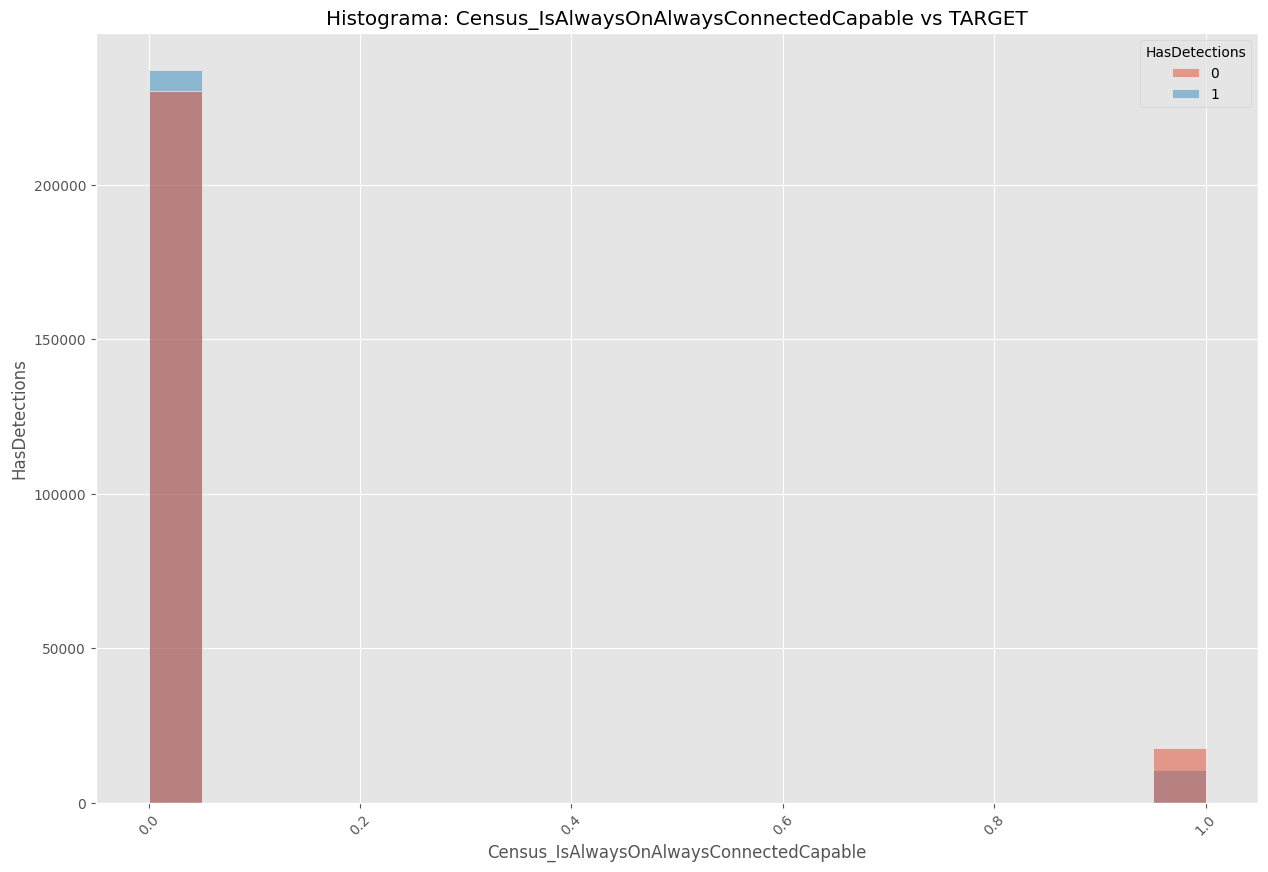

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


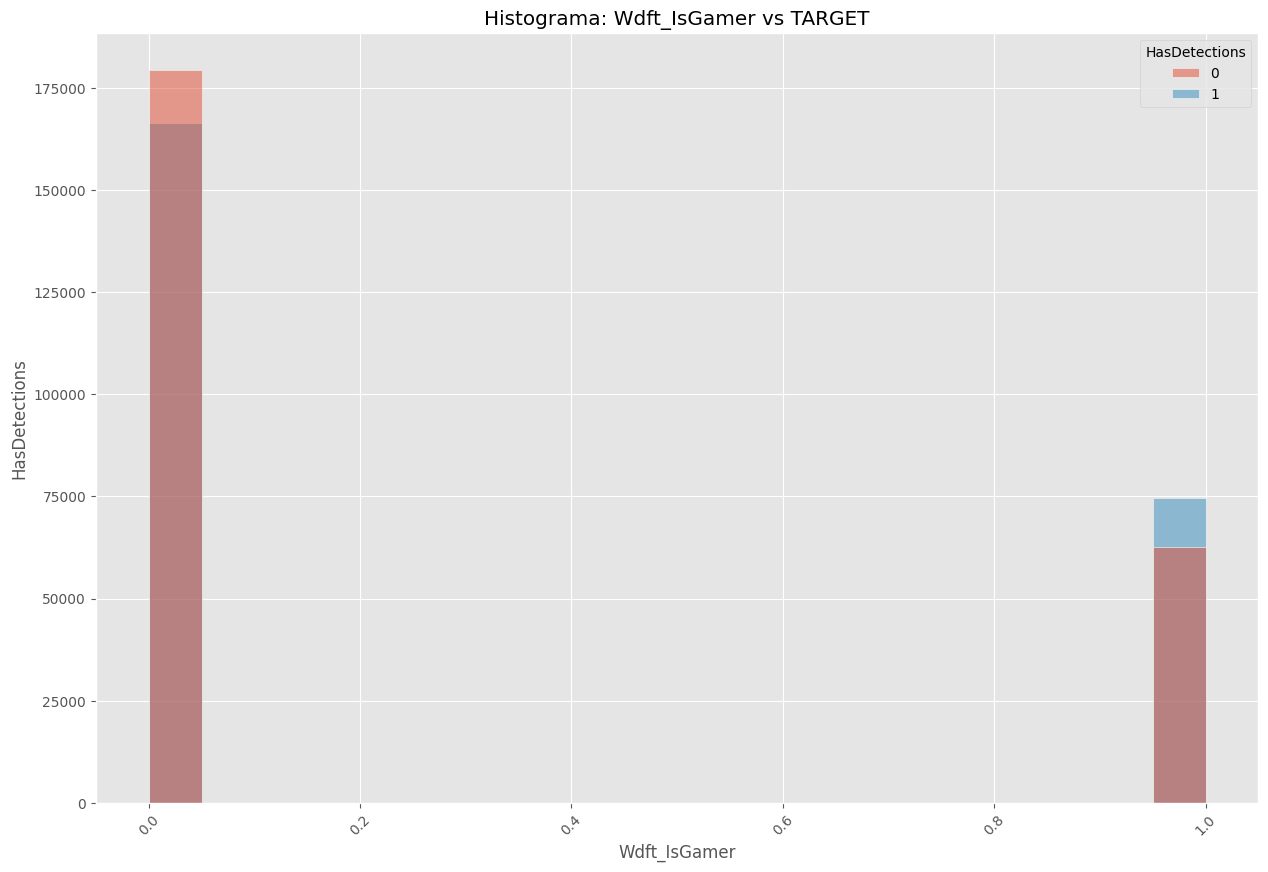

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


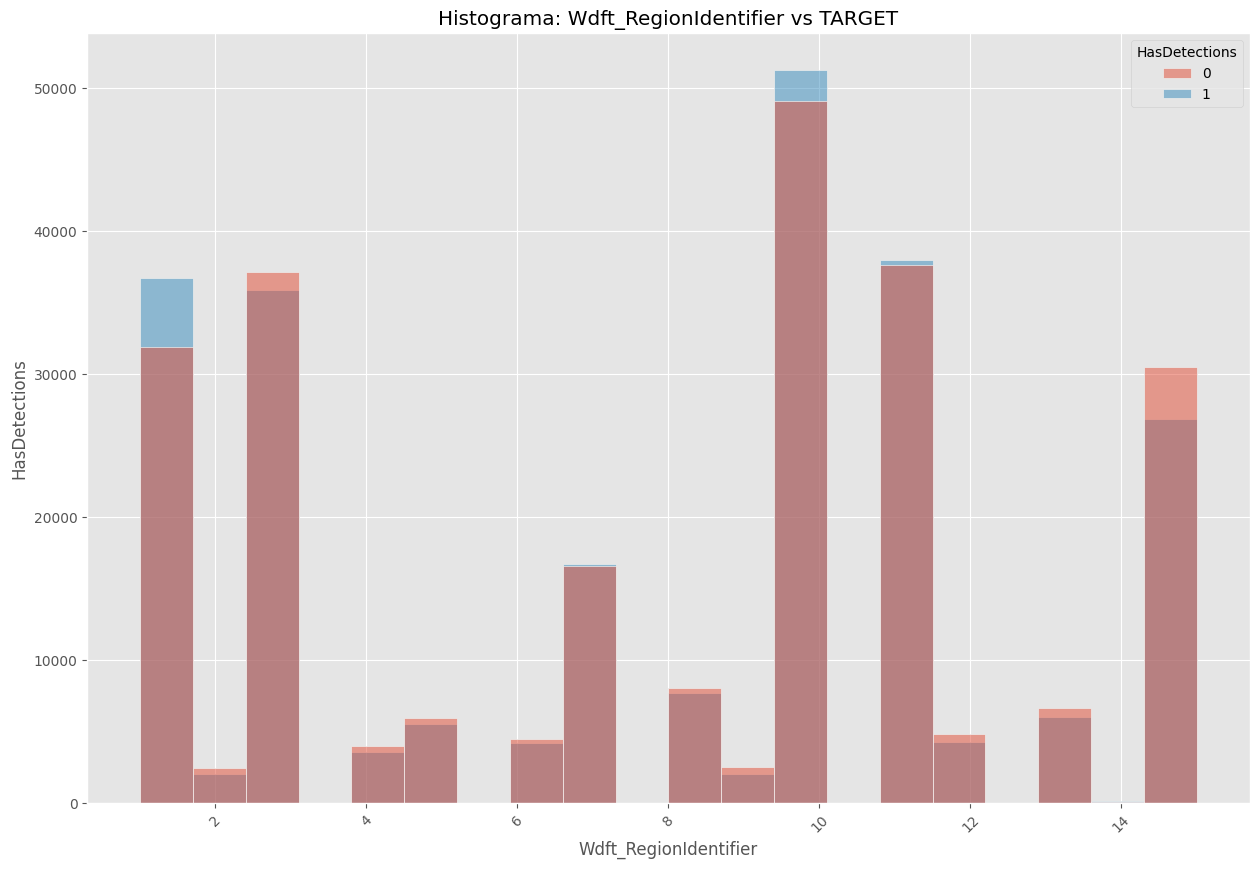

<ipython-input-230-e18f5c5e88ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


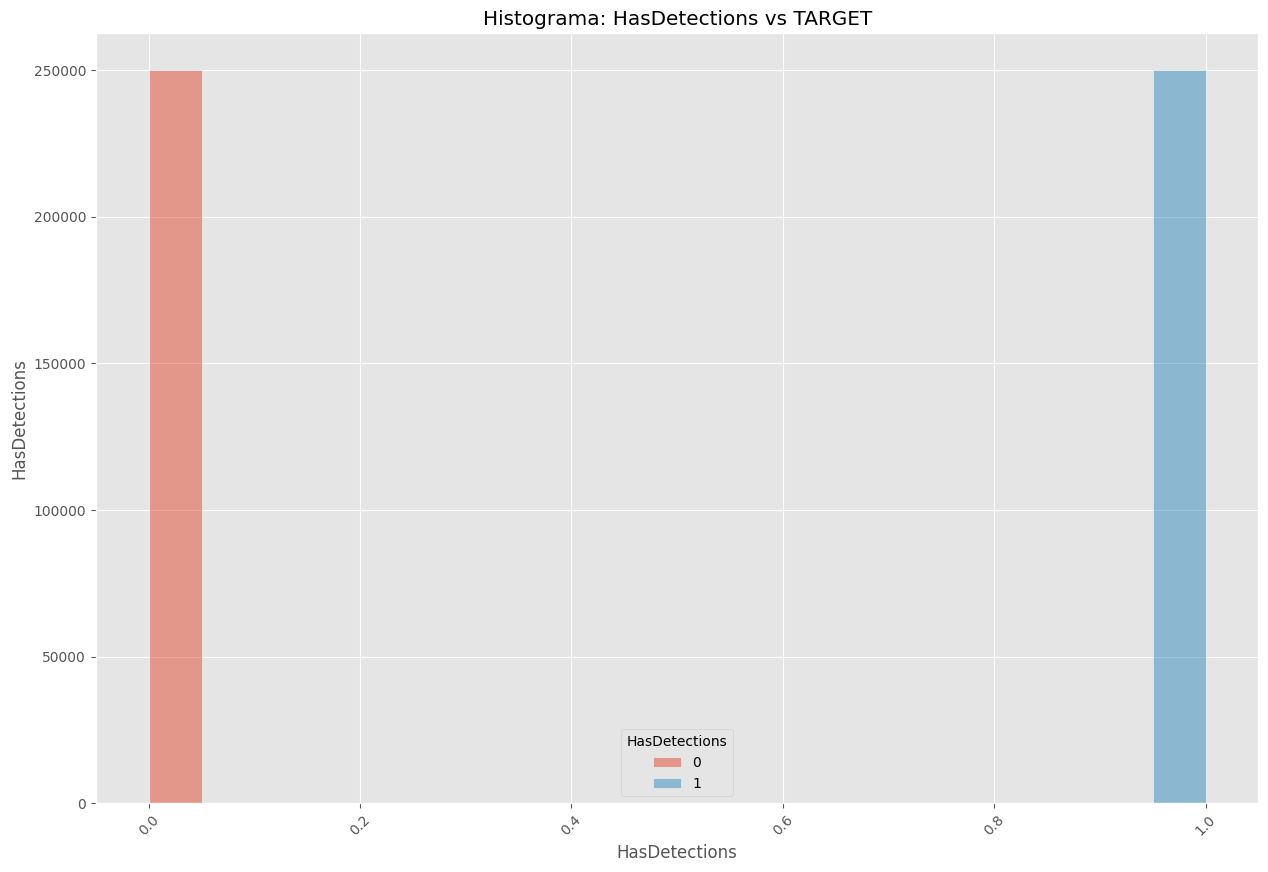

In [230]:
for col in df2:
  if (df2[col].dtype.kind =="f" or df2[col].dtype.kind =="i"):
    plt.figure(figsize=(15, 10))
    ax = sns.histplot(data=df_raw, x=col, hue= 'HasDetections', bins = 20)
    plt.xlabel(col)
    plt.ylabel('HasDetections')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f'Histograma: {col} vs TARGET')
    plt.show()

In [231]:
 # Analizando los histogramas podemos ver como 

   # EngineVersion --> "11152001" es buena predictora de "HasDetections" = 1
   # AppVersion --> "418180718075" es buena predictora de "HasDetections" = 1
   # AVProductStatesIdentifier --> "53447.0" es buena predictora de "HasDetections" = 1
   # AVProductsInstalled --> Tanto "1" es buena predictor de "HasDetections" = 1 como "2" y "3" son buenas predictoras de "HasDetections" = 0
   # Census_ProcessorModelIdentifier --> Los valores entre 2000 y 3000 son buenos predictores de "HasDetections" = 1
   # Wdft_IsGamer --> Tanto "1" es buena predictor de "HasDetections" = 1 como "0"es buen predictor de "HasDetections" = 0


## Encoding

### Frequency encoder

In [232]:
df3 = df2.copy()

In [233]:
lista_para_f_encoding = ["OsBuildLab","IeVerIdentifier","CountryIdentifier","LocaleEnglishNameIdentifier","GeoNameIdentifier","Census_FirmwareManufacturerIdentifier",
                         "Census_OEMNameIdentifier","Census_ProcessorModelIdentifier","AVProductStatesIdentifier","Census_FirmwareVersionIdentifier","CityIdentifier","Census_OEMModelIdentifier",
                         "Wdft_RegionIdentifier","Census_OSBuildRevision","Census_OSUILocaleIdentifier"]

for i in lista_para_f_encoding: 
  _freq_col = pd.DataFrame(df3[i].value_counts())
  _freq_col.columns = [i + "_f_encod"]
  _freq_col[i] = _freq_col.index
  df3 = df3.merge(_freq_col, on = i)
  df3.drop(i, axis = 1, inplace = True)

### One Hot Encoding

In [234]:
# Aplicamos un OneHotEncoding a aquellas columnas categóricas con menos de 100 categorías

lista_para_OHE = ["Census_PowerPlatformRoleName","Census_OSSkuName","Census_ActivationChannel","OsPlatformSubRelease","Census_OSWUAutoUpdateOptionsName","Census_GenuineStateName",
                  "Census_InternalBatteryType","Census_FlightRing","Census_MDC2FormFactor","SkuEdition","Census_OSEdition","Census_OSInstallTypeName","SmartScreen","Census_PrimaryDiskTypeName",
                  "OsSuite","Census_OSBuildNumber","Processor","Census_IsAlwaysOnAlwaysConnectedCapable","Census_ProcessorManufacturerIdentifier","Census_ChassisTypeName","Census_OSArchitecture",
                  "Census_OSBranch"]

for i in lista_para_OHE:
  df3 = OHE(df3, i)

## Partición train/test/validation

In [235]:
df3.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 180 columns):
 #    Column                                                                  Dtype  
---   ------                                                                  -----  
 0    EngineVersion                                                           int64  
 1    AppVersion                                                              int64  
 2    AvSigVersion                                                            int64  
 3    AVProductsInstalled                                                     float64
 4    OrganizationIdentifier                                                  float64
 5    OsBuild                                                                 int64  
 6    IsProtected                                                             float64
 7    Census_ProcessorCoreCount                                               float64
 8    Census_PrimaryDiskTota

In [236]:
df = df3.copy()

### Validación

In [237]:
# La partición de validación tiene que ser lo más parecida a la realidad posible, un % del dataset siempre mayor de 1000 filas. tenemos 500.000 en total, si cogemos 10% son 50.000 filas para validación

In [238]:
# Calcula los tamaños de cada partición
validation_size = int(len(df) * 0.1)
development_size = int(len(df) * 0.9)

In [239]:
# Asigna los datos a las particiones
val_df = df[:validation_size]
dev_df = df[validation_size:]


In [240]:
val_df_y = val_df[[TARGET]]

val_df_X = val_df.drop(TARGET,axis=1)

In [241]:
dev_df_y = dev_df[[TARGET]]

dev_df_x = dev_df.drop(TARGET,axis=1)

### Train y Test

In [242]:
#20% del dataset de development para test

In [243]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( dev_df_x, dev_df_y, test_size=0.2, random_state=42)

In [244]:
#Comprobar que la distribución de ambas particiones es parecida (media, percentiles y distrribución std). Si no lo es, cambiamos el random state o utilizamos k.fold

In [245]:
X_train.describe().T.head()

count          mean           std         min  \
EngineVersion           360000.0  1.115074e+07  2.795527e+03  11104010.0   
AppVersion              360000.0  6.233790e+11  1.033691e+12    443040.0   
AvSigVersion            360000.0  6.544749e+07  5.794696e+07         0.0   
AVProductsInstalled     360000.0  1.316836e+00  5.425420e-01        -1.0   
OrganizationIdentifier  360000.0  1.696557e+01  1.275713e+01        -1.0   

                                 25%           50%           75%           max  
EngineVersion           1.115100e+07  1.115100e+07  1.115200e+07  1.115301e+07  
AppVersion              4.181806e+11  4.181807e+11  4.181807e+11  4.171769e+12  
AvSigVersion            1.273757e+07  1.275903e+07  1.273167e+08  1.275180e+08  
AVProductsInstalled     1.000000e+00  1.000000e+00  2.000000e+00  5.000000e+00  
OrganizationIdentifier -1.000000e+00  1.800000e+01  2.700000e+01  5.200000e+01

In [246]:
X_test.describe().T.head()

count          mean           std         min  \
EngineVersion           90000.0  1.115077e+07  2.773013e+03  11121010.0   
AppVersion              90000.0  6.199773e+11  1.028186e+12    443040.0   
AvSigVersion            90000.0  6.551278e+07  5.796277e+07    123700.0   
AVProductsInstalled     90000.0  1.315456e+00  5.438259e-01        -1.0   
OrganizationIdentifier  90000.0  1.697502e+01  1.273209e+01        -1.0   

                                 25%           50%           75%           max  
EngineVersion           1.115100e+07  1.115100e+07  1.115200e+07  1.115301e+07  
AppVersion              4.181806e+11  4.181807e+11  4.181807e+11  4.171769e+12  
AvSigVersion            1.273770e+07  1.275907e+07  1.273168e+08  1.275180e+08  
AVProductsInstalled     1.000000e+00  1.000000e+00  2.000000e+00  5.000000e+00  
OrganizationIdentifier -1.000000e+00  1.800000e+01  2.700000e+01  5.200000e+01

# 3.- Modelling

## Decission Tree

In [247]:
#Instanciamos el modelo
dt=DecisionTreeClassifier(max_depth=6,random_state=42, min_samples_leaf=500)

In [248]:
#lo entrenamos con el dataset de train
dt.fit(X=X_train,y=y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=500, random_state=42)

In [249]:
#lo pintamos
tree_data=export_graphviz(
    decision_tree=dt,
    out_file=None, 
    max_depth=None,
    feature_names=X_test.columns,
    class_names=['No detection','Detection'],
    label="all",
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=True,
    rounded=True,
    special_characters=False,
    precision=3,
    fontname="helvetica",
)

In [250]:
# SmartScreen_ExistsNotSet <= 0.5
# AVProductStatesIdentifier_f_encod (lo repite varias veces)
# Census_TotalPhysicalRAM <= 4095.5
# EngineVersion (lo repite varias veces)
# AppVersion
# AvSigVersion 
# Wdft_IsGamer 
# Processor_x86 

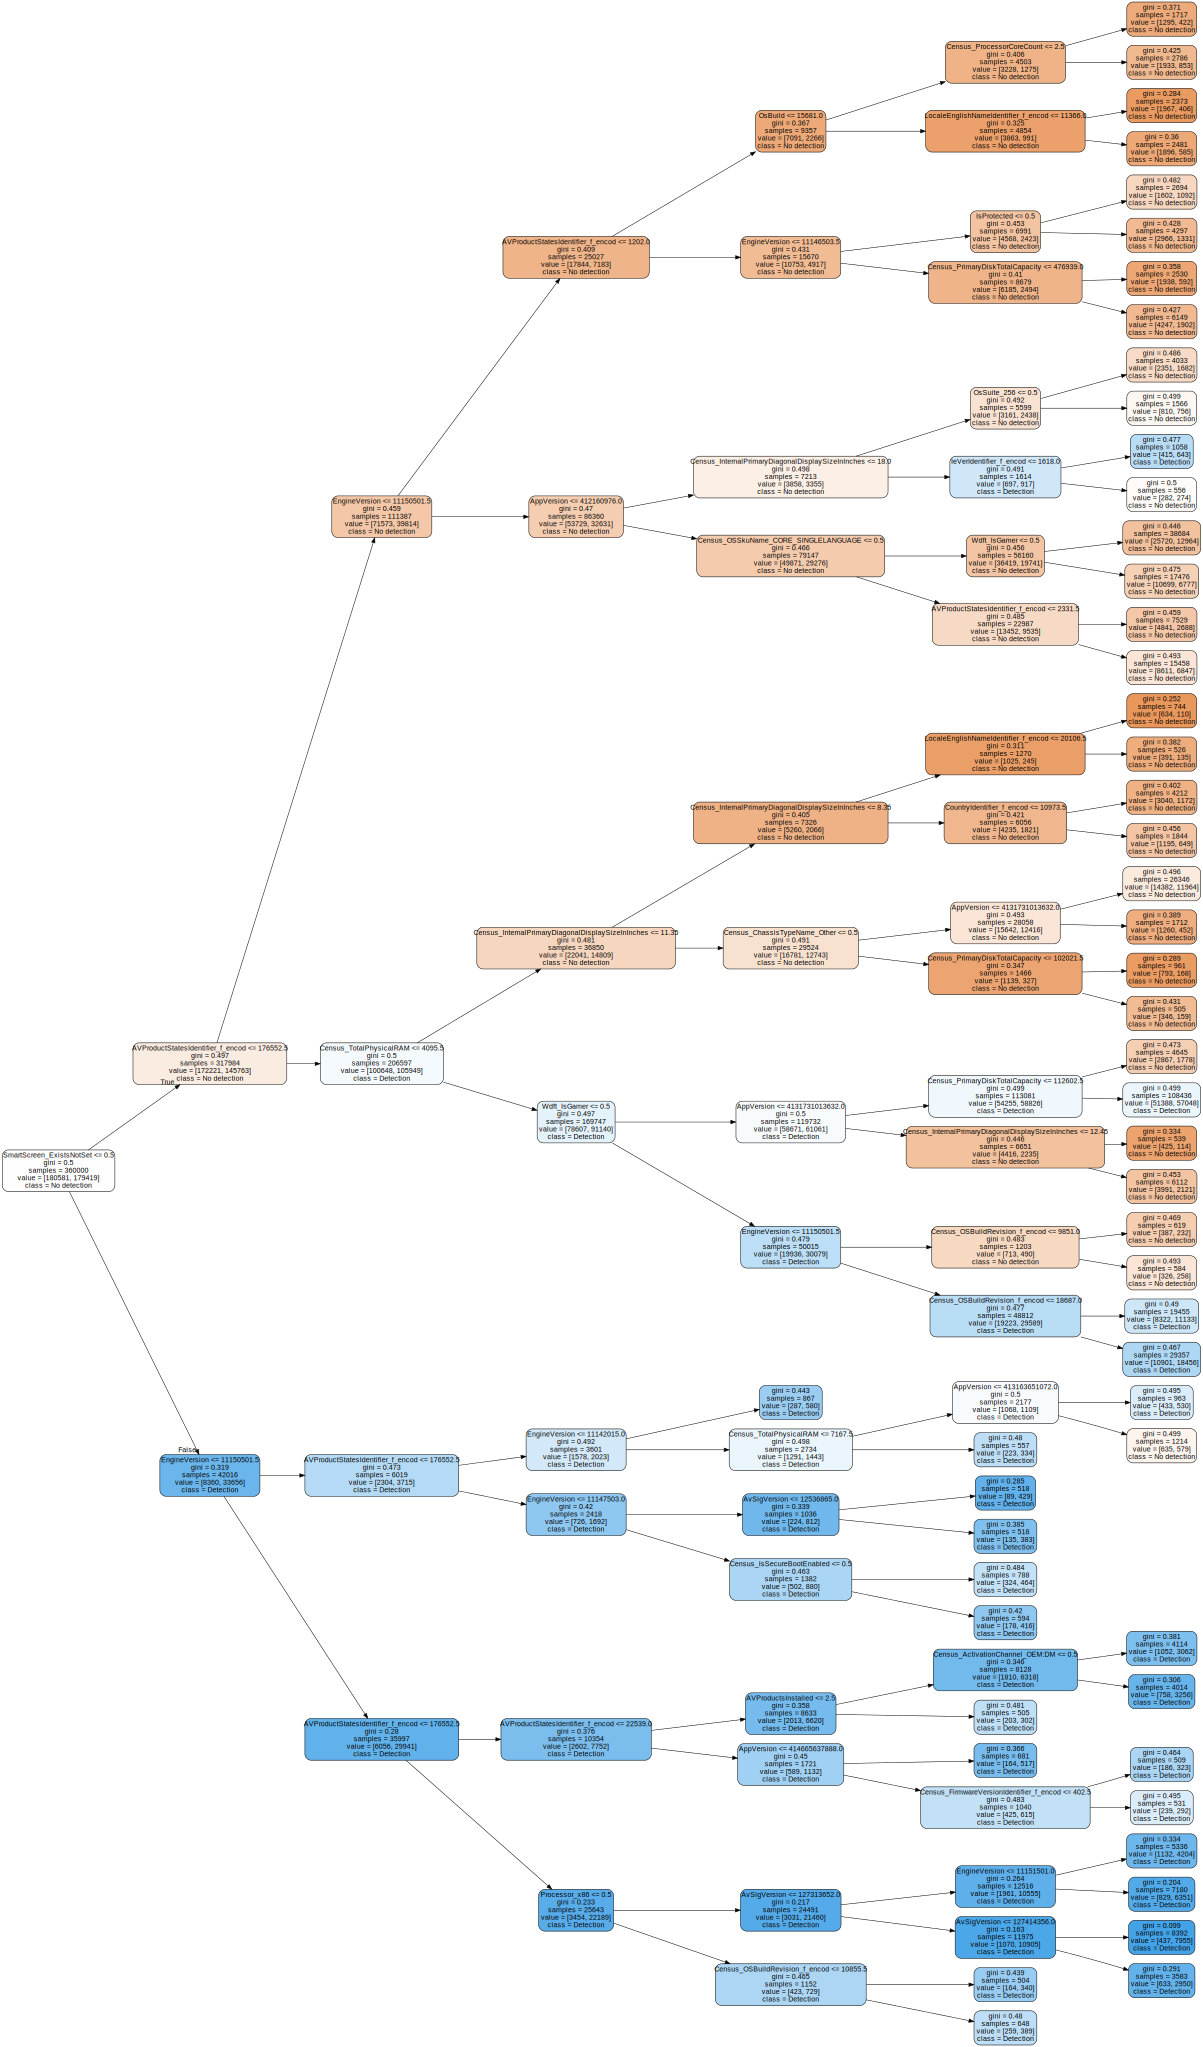

In [251]:
graphviz.Source(tree_data)

In [252]:
#generamos predicciones y evaluamos el modelo
y_test_pred = pd.DataFrame(dt.predict(X_test),index=y_test.index,columns=['DetectionPrediction'])

In [253]:
#join de y_test y y_test_pred para comparar el resultado real con la predicción
result_df=y_test.join(y_test_pred,how='inner')

In [254]:
result_df['Success']=(result_df['HasDetections']==result_df['DetectionPrediction']).astype(int)

In [255]:
result_df.head(20)

HasDetections  DetectionPrediction  Success
284806              0                    0        1
91549               0                    0        1
219822              0                    1        0
363751              1                    1        1
82640               0                    1        0
262760              1                    0        0
310538              1                    1        1
294605              1                    0        0
387073              0                    0        1
108740              0                    0        1
136470              1                    1        1
244123              0                    0        1
339390              1                    0        0
485576              1                    1        1
58180               1                    1        1
296240              0                    1        0
251339              1                    1        1
133504              0                    1        0
364693              1                    1        1
233515              0                    0        1

In [256]:
#Accuracy
result_df['Success'].mean()

0.6181666666666666

In [257]:
#Compruebo que el accuracy es mayor de la media del target 49.99% ( modelo más tonto, que siempre predice 0, predice 50.01%)

## Confusion matrix

In [258]:
confusion_matrix=pd.crosstab(result_df['HasDetections'],result_df['DetectionPrediction'])

In [259]:
TP=confusion_matrix.iloc[1,1]
TN=confusion_matrix.iloc[0,0]
FP=confusion_matrix.iloc[0,1]
FN=confusion_matrix.iloc[1,0]

In [260]:
confusion_matrix
# Parece que el modelo tiende a dar más falsos positivos, pero aproximadamente está  balanceado entre FP y FN

DetectionPrediction      0      1
HasDetections                    
0                    25652  19807
1                    14558  29983

In [261]:
dt.score(X_test,y_test)

0.6181666666666666

In [262]:
#generamos las predicciones del dataset de test pero como probabilidades
dt.predict_proba(X_test)

array([[0.69024901, 0.30975099],
       [0.61221103, 0.38778897],
       [0.47390166, 0.52609834],
       ...,
       [0.37132541, 0.62867459],
       [0.55705783, 0.44294217],
       [0.66487437, 0.33512563]])

In [263]:
#seleeciono las probabilidades de #1 y lo convierto en un dataframe
y_score= pd.DataFrame(dt.predict_proba(X_test)[:,1],index=y_test.index, columns=['DetectionScore'])

In [264]:
# lo combino con el dataframe anterior
result_df= result_df.join(y_score)

In [265]:
result_df.head(10)

HasDetections  DetectionPrediction  Success  DetectionScore
284806              0                    0        1        0.309751
91549               0                    0        1        0.387789
219822              0                    1        0        0.526098
363751              1                    1        1        0.884540
82640               0                    1        0        0.526098
262760              1                    0        0        0.335126
310538              1                    1        1        0.526098
294605              1                    0        0        0.387789
387073              0                    0        1        0.454111
108740              0                    0        1        0.174818

## F1 Score

In [266]:
# Desarrollo matemático de F1Score
Precision=TP/ (TP+FP)
Recall= TP/(TP+FN)
f1_score=2/(1/Precision+1/Recall)

In [267]:
# Precision = Cuántos positivos de los que detecta realmente lo son (según la confusion matrix, la precision será algo más baja)
# Recall alta = Cuántos positivos detecta el modelo del total

In [268]:
Precision

0.6021891946173931

In [269]:
Recall

0.6731550706091017

In [270]:
metrics.f1_score(y_test,y_test_pred)

0.6356977027700332

## AUC y ROC curve

In [271]:
metrics.roc_auc_score(result_df['HasDetections'],result_df['DetectionScore'])

0.6698461270873586

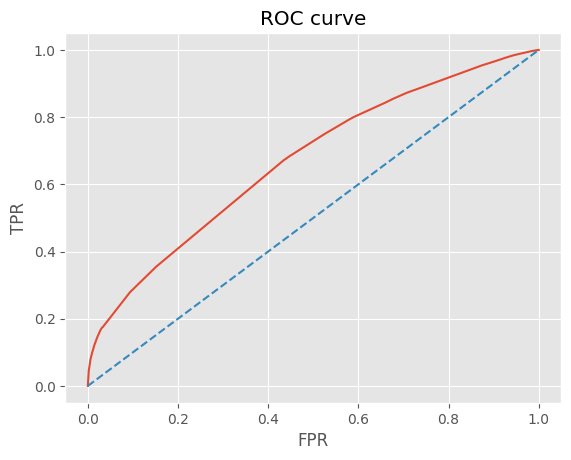

In [272]:
fpr,tpr,th=metrics.roc_curve(result_df['HasDetections'],result_df['DetectionScore'])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


## Control del overfitting

In [273]:
for i in range(1,15):
  #instancio el modelo
  dt2= DecisionTreeClassifier(max_depth=i,random_state=42)
  #entreno el modelo
  dt2.fit(X_train,y_train)
  #evaluo 
  acc_train = dt2.score(X_train,y_train)
  acc_test = dt2.score(X_test,y_test)
  print(f'Profundidad de arbol: {i}, Acc.train: {np.round(acc_train,3)},Acc.test: {np.round(acc_test,3)}')

Profundidad de arbol: 1, Acc.train: 0.572,Acc.test: 0.576
Profundidad de arbol: 2, Acc.train: 0.587,Acc.test: 0.588
Profundidad de arbol: 3, Acc.train: 0.607,Acc.test: 0.608
Profundidad de arbol: 4, Acc.train: 0.607,Acc.test: 0.608
Profundidad de arbol: 5, Acc.train: 0.614,Acc.test: 0.615
Profundidad de arbol: 6, Acc.train: 0.617,Acc.test: 0.618
Profundidad de arbol: 7, Acc.train: 0.618,Acc.test: 0.618
Profundidad de arbol: 8, Acc.train: 0.621,Acc.test: 0.621
Profundidad de arbol: 9, Acc.train: 0.628,Acc.test: 0.623
Profundidad de arbol: 10, Acc.train: 0.636,Acc.test: 0.627
Profundidad de arbol: 11, Acc.train: 0.641,Acc.test: 0.626
Profundidad de arbol: 12, Acc.train: 0.649,Acc.test: 0.626
Profundidad de arbol: 13, Acc.train: 0.658,Acc.test: 0.625
Profundidad de arbol: 14, Acc.train: 0.67,Acc.test: 0.622


In [274]:
#puedo probar con diferent numero de observaciones en el nodo final
for i in range(1,15):
  dt2= DecisionTreeClassifier(max_depth=i,random_state=42,min_samples_split=500)
  dt2.fit(X_train,y_train)
  acc_train = dt2.score(X_train,y_train)
  acc_test = dt2.score(X_test,y_test)


  print(f'Profundidad de arbol: {i}, Acc.train: {np.round(acc_train,3)},Acc.test: {np.round(acc_test,3)}')

Profundidad de arbol: 1, Acc.train: 0.572,Acc.test: 0.576
Profundidad de arbol: 2, Acc.train: 0.587,Acc.test: 0.588
Profundidad de arbol: 3, Acc.train: 0.607,Acc.test: 0.608
Profundidad de arbol: 4, Acc.train: 0.607,Acc.test: 0.608
Profundidad de arbol: 5, Acc.train: 0.614,Acc.test: 0.615
Profundidad de arbol: 6, Acc.train: 0.617,Acc.test: 0.618
Profundidad de arbol: 7, Acc.train: 0.618,Acc.test: 0.618
Profundidad de arbol: 8, Acc.train: 0.62,Acc.test: 0.621
Profundidad de arbol: 9, Acc.train: 0.626,Acc.test: 0.624
Profundidad de arbol: 10, Acc.train: 0.632,Acc.test: 0.627
Profundidad de arbol: 11, Acc.train: 0.635,Acc.test: 0.628
Profundidad de arbol: 12, Acc.train: 0.638,Acc.test: 0.629
Profundidad de arbol: 13, Acc.train: 0.641,Acc.test: 0.63
Profundidad de arbol: 14, Acc.train: 0.645,Acc.test: 0.628


In [275]:
# Vamos a volver a entrenar el modelo y reevaluar métricas con una profundidad de arbol de 11 y un minsamples de 500

## Modelo final

In [276]:
#utilizamos los parametros que hemos sacado del control del overfitting

final_dt=DecisionTreeClassifier(max_depth=11,random_state=42,min_samples_split=500)

In [277]:
#entreno
final_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=500, random_state=42)

In [278]:
#evaluo en test
final_dt.score(X_test,y_test)

0.6280444444444444

In [279]:
#evaluo en validación
final_dt.score(val_df_X,val_df_y)


0.64112

## Modelos alternativos

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
#Random Forest con 10 replicas
rf = RandomForestClassifier (max_depth=11,random_state=42,min_samples_split=500,n_estimators=10)

In [282]:
rf.fit(X_train,y_train)

<ipython-input-282-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=11, min_samples_split=500, n_estimators=10,
                       random_state=42)

In [283]:
rf.score(X_test,y_test)
# Se ganan 3 décimas en Accuracy usando el random forest

0.6292555555555556

In [284]:
'''Como el dataset sobre el que tiramos el modelo es lo suficientemente grande,
el Random Forest saca una Acc muy similar. Modelos alternativos como el Random Forest o el XGBoost
son útiles para datasets que se puedan quedar cortos en datos'''

'Como el dataset sobre el que tiramos el modelo es lo suficientemente grande,\nel Random Forest saca una Acc muy similar. Modelos alternativos como el Random Forest o el XGBoost\nson útiles para datasets que se puedan quedar cortos en datos'

## Variables más predictivas

In [285]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [286]:
top_features
# Aquí vemos las variables que el modelo ha considerado como más predictivas

SmartScreen_ExistsNotSet                             0.279768
AVProductStatesIdentifier_f_encod                    0.114556
AVProductsInstalled                                  0.092465
SmartScreen_RequireAdmin                             0.059549
Census_TotalPhysicalRAM                              0.044935
AvSigVersion                                         0.044433
EngineVersion                                        0.040462
AppVersion                                           0.026746
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.019267
SmartScreen_-1                                       0.016161
Census_InternalPrimaryDisplayResolutionHorizontal    0.010398
CountryIdentifier_f_encod                            0.010161
Census_PrimaryDiskTotalCapacity                      0.010019
OsBuildLab_f_encod                                   0.009563
Census_OSInstallTypeName_UUPUpgrade                  0.007921
Census_OSBuildRevision_f_encod                       0.007595
Wdft_IsG